In [103]:
#EV CHARGING STATIONS IN INDIA

In [104]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Filtering out the warnings.
import warnings
warnings.filterwarnings("ignore")

# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline



#Model Building libraries
import statsmodels.api as sm

from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

# Loading the dataset¶

In [105]:
#read the mcdonalds dataset
station_df = pd.read_csv(r'C:\Users\VASU RAVILLA\Downloads\ev-charging-stations-india.csv') 

In [106]:
station_df.head()

name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

                                             address  lattitude  longitude  \
0  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...    29.6019    76.9803   
1  DLF Phase IV, Sector 28, Gurugram, Haryana 122022    28.4673    77.0818   
2  Jaipur to Delhi Road, Behror Midway, Behror, R...    27.8751    76.2760   
3  Fun and Food Carnival, NH 58, Khatauli Bypass,...    29.3105    77.7218   
4  NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...    29.3105    77.7218   

   type  
0  12.0  
1  12.0  
2  12.0  
3  12.0  
4  12.0

In [107]:
 station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1508 non-null   object 
 4   lattitude  1541 non-null   float64
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(3), object(4)
memory usage: 84.7+ KB


In [108]:
(station_df.isnull().sum()/len(station_df))*100

name         0.000000
state        0.000000
city         0.000000
address      2.521008
lattitude    0.387847
longitude    0.387847
type         0.517130
dtype: float64

In [109]:
station_df.shape

(1547, 7)

# Data Preprocessing

In [110]:
cities = ['guwahati','Mumbai','Buldhana', 'Navi Mumbai', 'Khalumbre', 'Munnar']

# Impute missing values using mode (handle potential errors)
for col in ['longitude', 'lattitude']:
    try:
        imputation_value = station_df[col].mode()[0]
        for city in cities:
            station_df.loc[station_df['city'] == city, col] = station_df[col].fillna(imputation_value)
    except KeyError:  # Handle case where there's no mode (all missing values)
        print(f"Warning: No mode found for column '{col}'. Skipping imputation.")

In [111]:
station_df[station_df['city'] == 'guwahati']# checking for missing values in mumbai

name           state      city  \
375               SAR Motors       Rajasthan  guwahati   
376                R R Sales  Madhya Pradesh  guwahati   
379  Royal Global University           Assam  guwahati   
381    Ather Space, Guwahati          Punjab  guwahati   
384     Ather Service Centre       Rajasthan  guwahati   

                                               address  lattitude  longitude  \
375  Bora Commercial Complex, opposite ABC Compound...  28.618260  77.212570   
376  Saraf Building, Near Police Reserve RLY gate, ...  26.176336  91.740471   
379                 NH-37, opp. Tirupati Balaji Temple  26.112203  91.724158   
381  2nd Floor, JKON building, opp. Sonaram School,...  26.172606  91.729344   
384                  House No 20,Janapath Lane,Ulubari  26.170766  91.760818   

     type  
375   6.0  
376   6.0  
379   6.0  
381   6.0  
384   6.0

In [112]:
(station_df.isnull().sum()/len(station_df))*100

name         0.000000
state        0.000000
city         0.000000
address      2.521008
lattitude    0.000000
longitude    0.000000
type         0.517130
dtype: float64

In [113]:
#dropping address blank values
station_df = station_df.dropna(subset=['address'])

In [114]:
station_df.shape

(1508, 7)

In [115]:
(station_df.isnull().sum()/len(station_df))*100

name         0.000000
state        0.000000
city         0.000000
address      0.000000
lattitude    0.000000
longitude    0.000000
type         0.397878
dtype: float64

In [116]:
#dropping type blank values
station_df = station_df.dropna(subset=['type'])

In [117]:
(station_df.isnull().sum()/len(station_df))*100

name         0.0
state        0.0
city         0.0
address      0.0
lattitude    0.0
longitude    0.0
type         0.0
dtype: float64

In [118]:
# Get the value counts of all the columns

for column in station_df:
    print(station_df[column].astype('category').value_counts())

    print('***********************************************************')

name
Tata Power                                                                      58
EESL Chelmsford Club                                                             9
Charge Zone                                                                      8
Oberoi Mall, Goregaon                                                            4
Hotel Sapthagiri Holiday Resorts,Tirupati u00e2u0080u0093 Bangalore  Highway     4
                                                                                ..
GJ | Chikhali | Chikhli - Hotel Empire                                           1
GJ | Limbdi | HFM (Highway Food Mall)                                            1
GJ | Surat | Kamrej                                                              1
GJ|NAVSARI|NH 8,GRID ROAD                                                        1
u00c2u00a0EESL Sushma Swaraj Bhawan                                              1
Name: count, Length: 1106, dtype: int64
******************************************

In [119]:
# dropping address column since it is not significant for further analysis
station_df=station_df.drop('address',axis=1)

In [120]:
station_df.head()

name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

   lattitude  longitude  type  
0    29.6019    76.9803  12.0  
1    28.4673    77.0818  12.0  
2    27.8751    76.2760  12.0  
3    29.3105    77.7218  12.0  
4    29.3105    77.7218  12.0

In [121]:
station_df.describe()

lattitude    longitude         type
count  1502.000000  1502.000000  1502.000000
mean     19.916440    77.553612     8.940746
std       6.986974     4.859102     4.147331
min       8.390198     8.058454     6.000000
25%      13.033177    75.777341     7.000000
50%      19.100206    77.217173     7.000000
75%      26.891727    78.542812    10.000000
max      77.597289    94.168072    24.000000

In [122]:
def hue_count(x, y, p = 'deep'):
    ax = sns.countplot(x = station_df[x], hue = station_df[y], palette = p)
    ax.set_title('"{}" Composition'.format(x), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.set_xlabel(x, fontsize = 14)
    ax.set_ylabel('Count', fontsize = 14)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'Haryana'),
  Text(1, 0, 'Rajasthan'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'Himachal Pradesh'),
  Text(4, 0, 'Maharashtra'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'Tamil Nadu'),
  Text(7, 0, 'Uttarakhand'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Telangana'),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Punjab'),
  Text(13, 0, 'Pondicherry'),
  Text(14, 0, 'Tamil Nadu '),
  Text(15, 0, 'Andhra Pradesh'),
  Text(16, 0, 'Telangana '),
  Text(17, 0, 'Maharashtra '),
  Text(18, 0, 'Kerala'),
  Text(19, 0, ' Telangana'),
  Text(20, 0, 'WestBengal'),
  Text(21, 0, 'Bihar'),
  Text(22, 0, 'Jammu and Kashmir'),
  Text(23, 0, 'Chhattisgarh'),
  Text(24, 0, 'Madhya Pradesh'),
  Text(25, 0, 'Jharkhand'),
  Text(26, 0, 'Odisha'),
  Text(27, 0, 'West Bengal '),
  Text(28, 0, ' Haryana'),
  Text

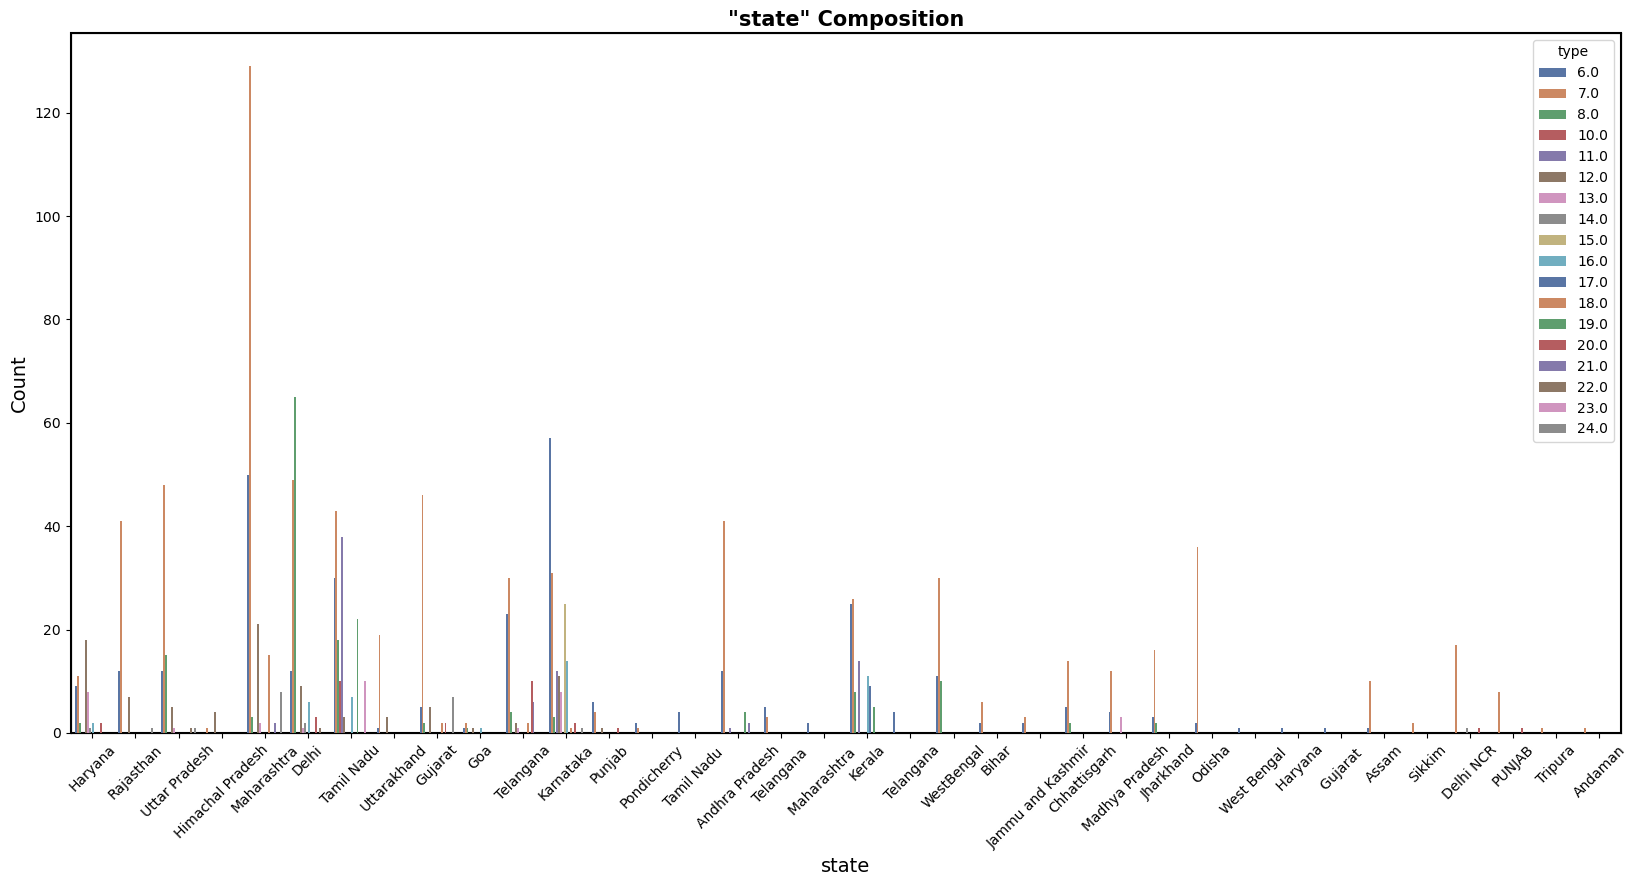

In [123]:
plt.figure(figsize = [20,20])
plt.subplot(211)
hue_count(x = 'state', y = 'type')
plt.xticks(rotation = 45)

In [124]:
# # Group data by state and get city counts
# counts_by_state = station_df.groupby('state').count()

# # Extract state names for x-axis categories (assuming 'state' column exists)
# states = counts_by_state.index.to_numpy()  # Using .iloc or index for state names

# # Create bar chart
# plt.bar(range(len(states)), counts_by_state['city'])  # Use 'city' column for y-axis values
# plt.xlabel('State')
# plt.ylabel('Number of state')
# plt.title(' Distribution by State (Count)')
# plt.xticks(range(len(states)), states, rotation=50)  # Optional: Rotate long x-axis labels
# plt.show()

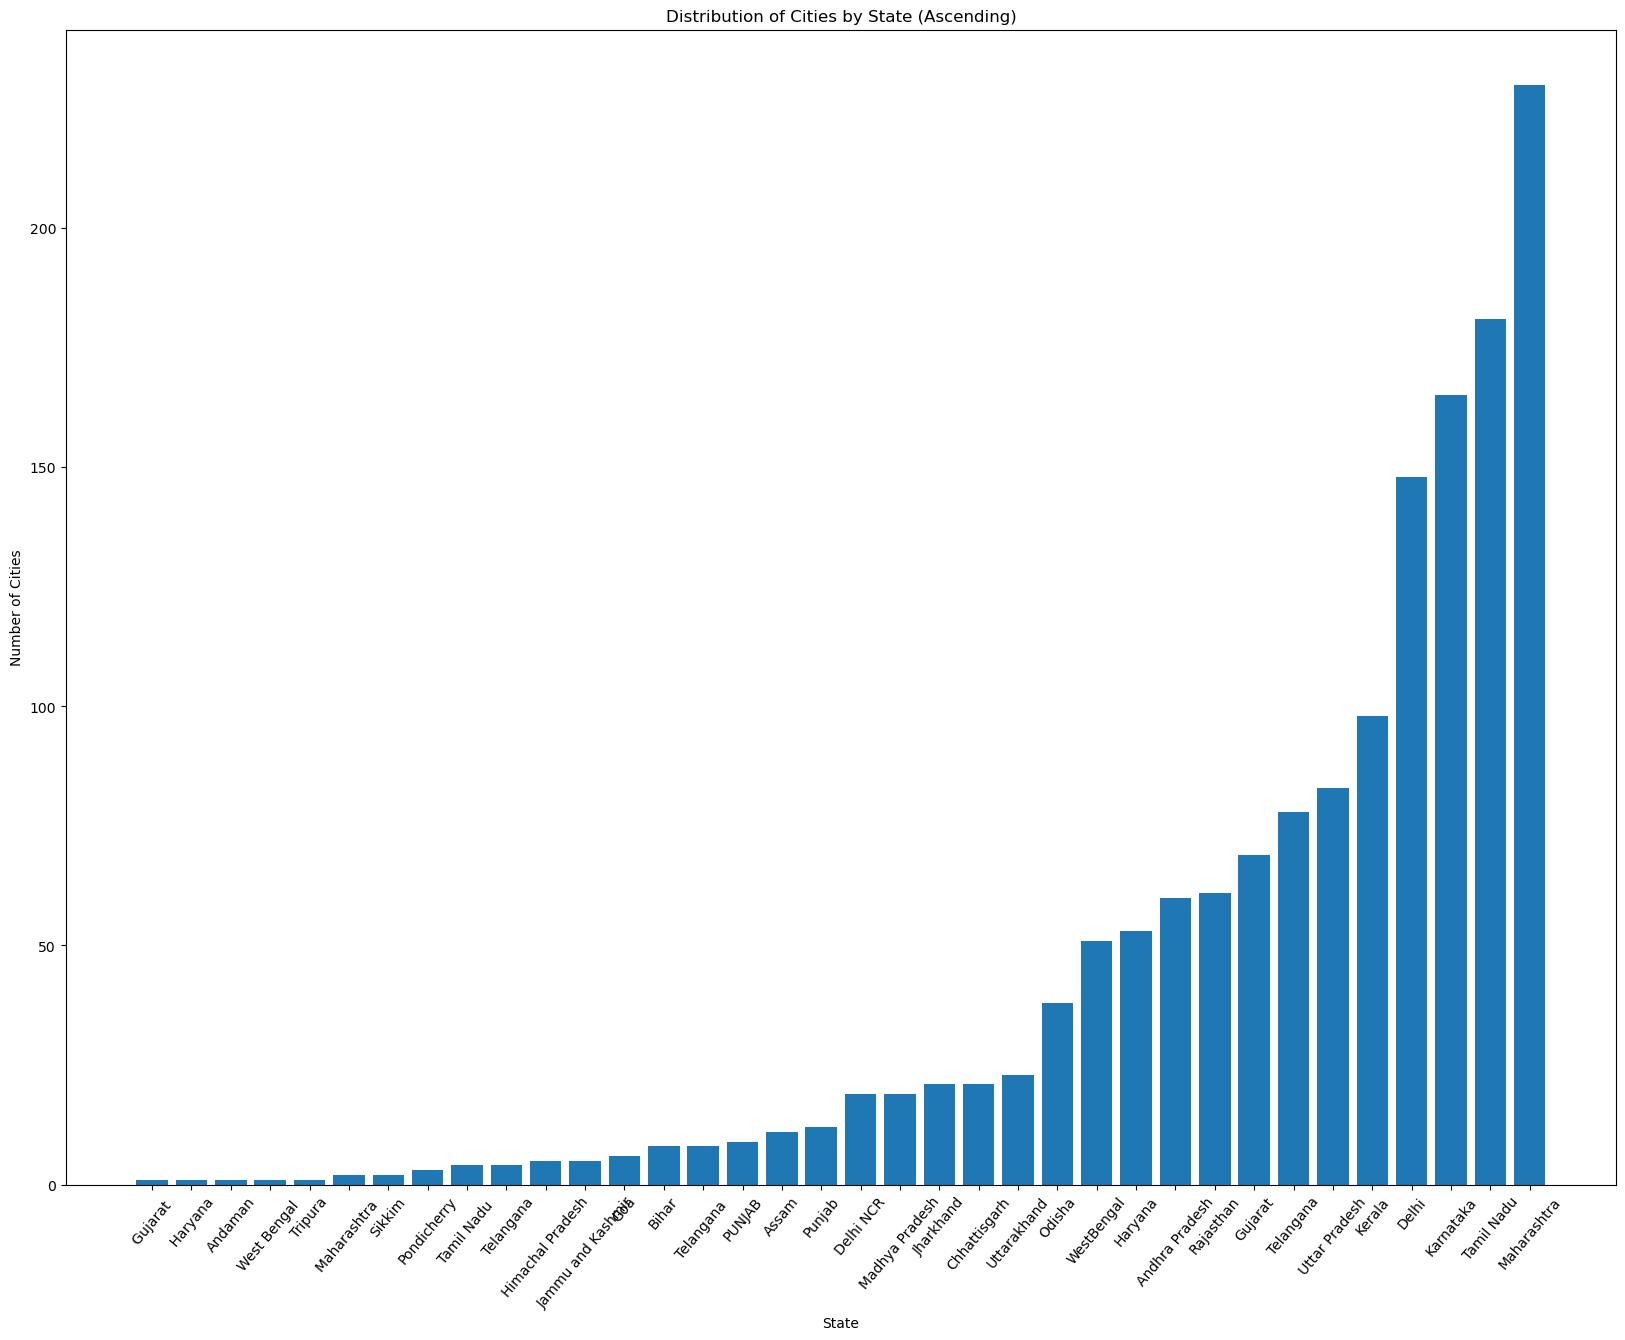

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

 

# Group data by state and get city counts
counts_by_state = station_df.groupby('state')['city'].count()  # Specify 'city' column for counting

# Sort the DataFrame by city count in ascending order
counts_by_state = counts_by_state.sort_values()  

# Extract state names for x-axis categories (assuming 'state' column exists)
states = counts_by_state.index.to_numpy()

# Create bar chart with sorted city counts
plt.bar(range(len(states)), counts_by_state.values)   
plt.xlabel('State')
plt.ylabel('Number of Cities')
plt.title('Distribution of Cities by State (Ascending)')
plt.xticks(range(len(states)), states, rotation=50)   
plt.show()

In [126]:
# States like Karnataka, Maharashtra, and Tamil Nadu have a higher concentration of cities with EV charging stations, indicating greater potential for EV adoption. In contrast, states like Andaman and West Bengal have fewer cities with stations, suggesting a need for strategic infrastructure development in these regions. 

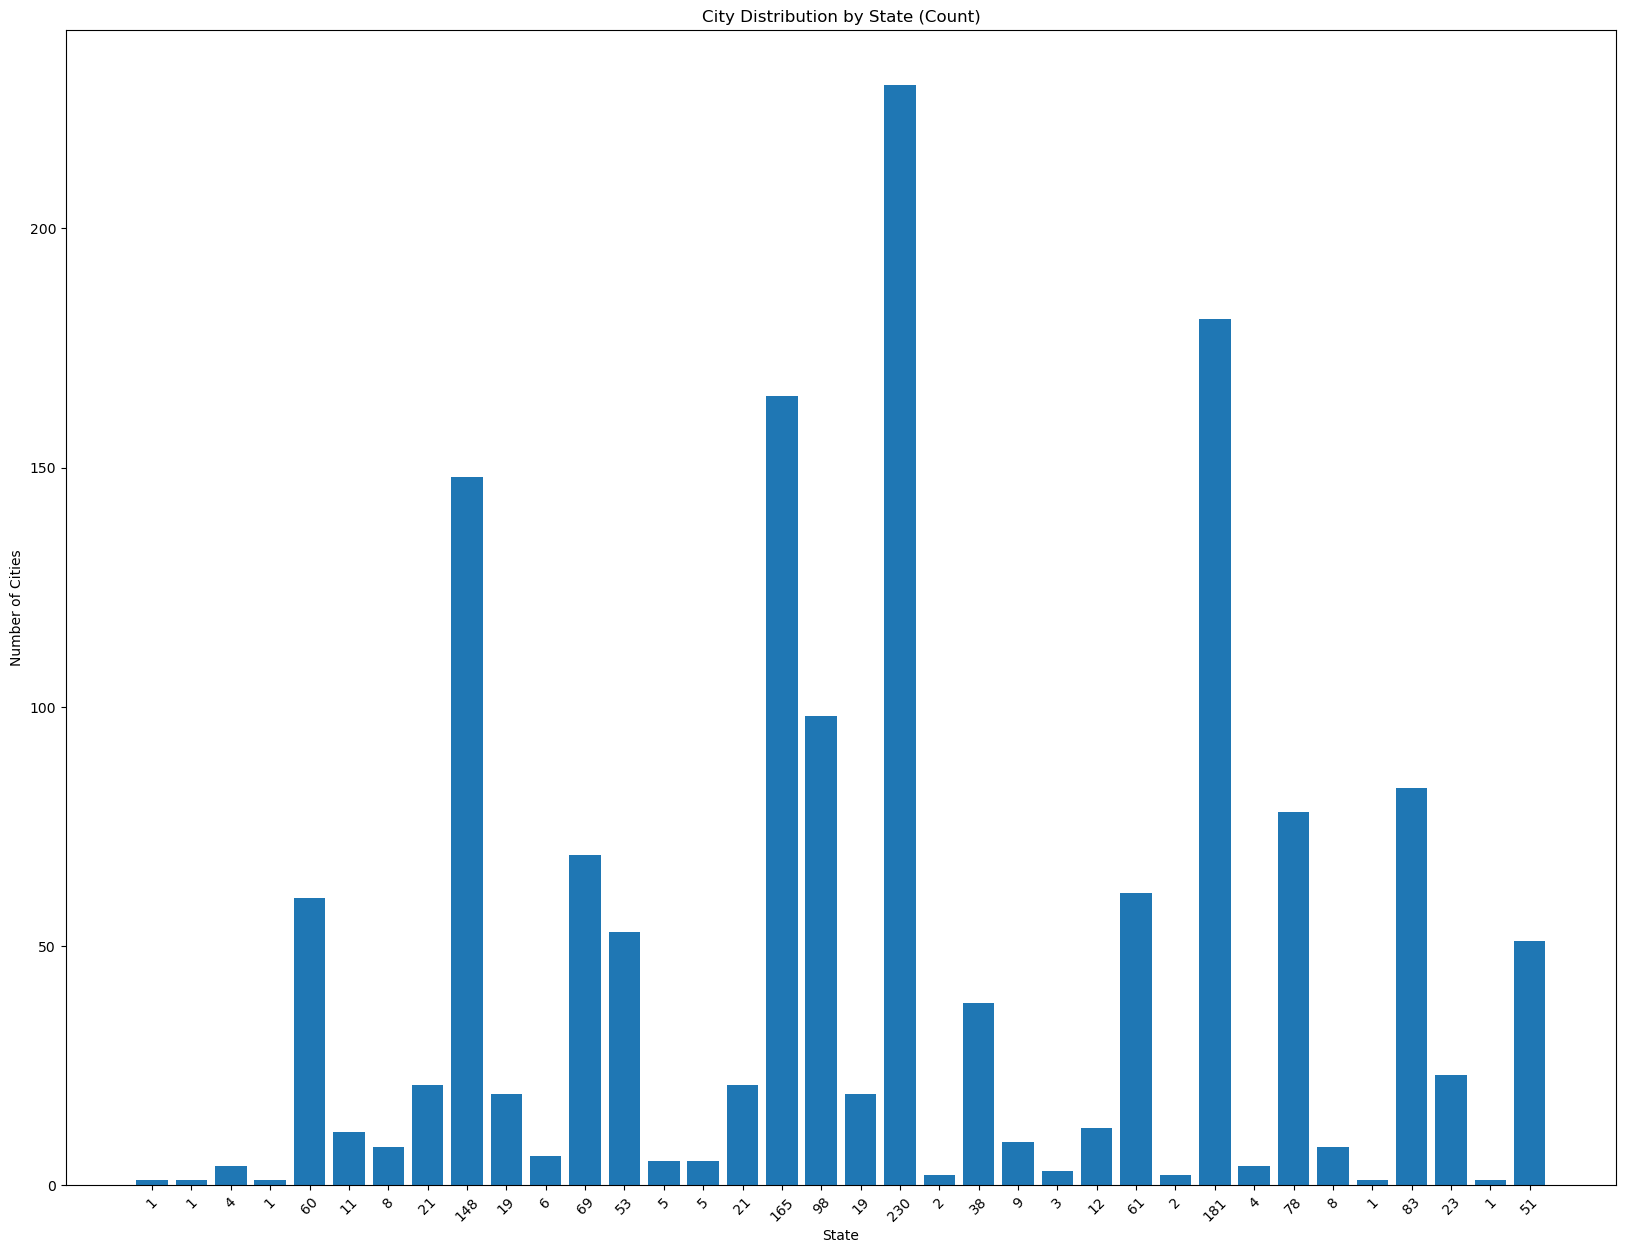

In [127]:
# Group data by state and get city counts
city_counts_by_state = station_df.groupby('state')['city'].count().tolist()

# Create bar chart
plt.bar(range(len(city_counts_by_state)), city_counts_by_state)  # Use range for x-axis ticks
plt.xlabel('State')
plt.ylabel('Number of Cities')
plt.title('City Distribution by State (Count)')
plt.xticks(range(len(city_counts_by_state)), city_counts_by_state, rotation=45)  # Optional: Rotate long x-axis labels
plt.show()

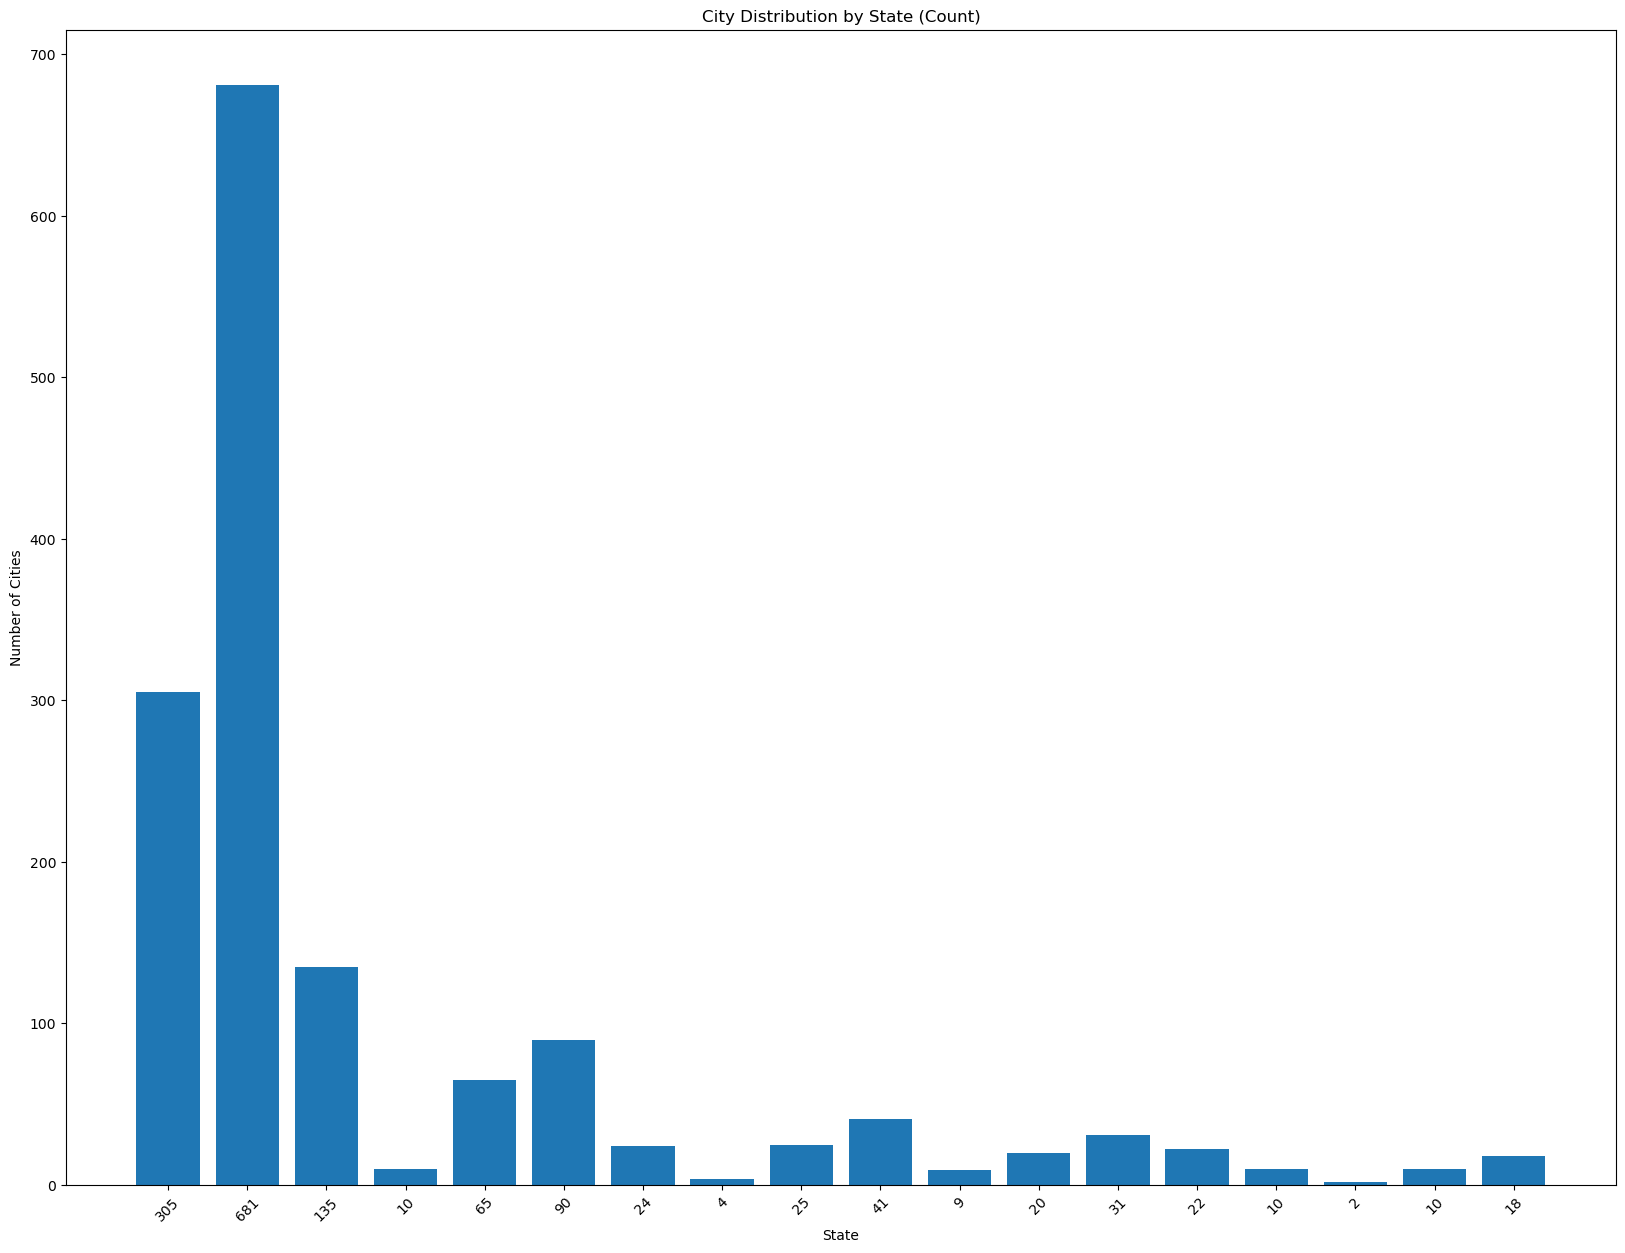

In [128]:
# Group data by state and get city counts
city_counts_by_state = station_df.groupby('type')['state'].count().tolist()

# Create bar chart
plt.bar(range(len(city_counts_by_state)), city_counts_by_state)  # Use range for x-axis ticks
plt.xlabel('State')
plt.ylabel('Number of Cities')
plt.title('City Distribution by State (Count)')
plt.xticks(range(len(city_counts_by_state)), city_counts_by_state, rotation=45)  # Optional: Rotate long x-axis labels
plt.show()

681 stations are of type 7 followed by 305 stations under type 6

In [129]:
print(station_df.groupby('type')['state'].value_counts())

type  state        
6.0   Karnataka        57
      Maharashtra      50
      Tamil Nadu       30
      Kerala           25
      Telangana        23
                       ..
24.0  Maharashtra       8
      Gujarat           7
      Karnataka         1
      Rajasthan         1
      Uttar Pradesh     1
Name: count, Length: 135, dtype: int64


In [130]:
value_counts = station_df.groupby('type')['state'].value_counts().unstack(fill_value=0)
for col in value_counts.columns:
    for idx, val in value_counts[col].items():
        print(f"State: {idx}, Type: {col}, Count: {val}")


State: 6.0, Type:  Gujarat , Count: 1
State: 7.0, Type:  Gujarat , Count: 0
State: 8.0, Type:  Gujarat , Count: 0
State: 10.0, Type:  Gujarat , Count: 0
State: 11.0, Type:  Gujarat , Count: 0
State: 12.0, Type:  Gujarat , Count: 0
State: 13.0, Type:  Gujarat , Count: 0
State: 14.0, Type:  Gujarat , Count: 0
State: 15.0, Type:  Gujarat , Count: 0
State: 16.0, Type:  Gujarat , Count: 0
State: 17.0, Type:  Gujarat , Count: 0
State: 18.0, Type:  Gujarat , Count: 0
State: 19.0, Type:  Gujarat , Count: 0
State: 20.0, Type:  Gujarat , Count: 0
State: 21.0, Type:  Gujarat , Count: 0
State: 22.0, Type:  Gujarat , Count: 0
State: 23.0, Type:  Gujarat , Count: 0
State: 24.0, Type:  Gujarat , Count: 0
State: 6.0, Type:  Haryana, Count: 1
State: 7.0, Type:  Haryana, Count: 0
State: 8.0, Type:  Haryana, Count: 0
State: 10.0, Type:  Haryana, Count: 0
State: 11.0, Type:  Haryana, Count: 0
State: 12.0, Type:  Haryana, Count: 0
State: 13.0, Type:  Haryana, Count: 0
State: 14.0, Type:  Haryana, Count: 0


In [131]:
station_df.head()

name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

   lattitude  longitude  type  
0    29.6019    76.9803  12.0  
1    28.4673    77.0818  12.0  
2    27.8751    76.2760  12.0  
3    29.3105    77.7218  12.0  
4    29.3105    77.7218  12.0

In [132]:
# pip install folium

In [133]:
try:
  # Remove trailing comma using string slicing (assuming consistent format)
  station_df['lattitude'] = station_df['lattitude'].str.rstrip(',')
  # Convert the column to floats
  station_df['lattitude'] = pd.to_numeric(station_df['lattitude'], errors='coerce')
except:
  print("Error: Encountered issues while converting 'lattitude' to floats.")

Error: Encountered issues while converting 'lattitude' to floats.


In [134]:
# station_df['lattitude']=station_df['lattitude'].astype(int)

In [135]:
import folium
import requests  # Optional, for API requests


# Function to create the map with markers
def create_ev_station_map(station_df):
  india_map = folium.Map(location=[8.39, 95.00], tiles='openstreetmap', zoom_start=5)  # Initial center on India

  # Iterate through each row (assuming 'lattitude' and 'longitude' are columns)
  for index, row in station_df.iterrows():
    latitude = row['lattitude']
    longitude = row['longitude']
    folium.Marker([latitude, longitude], tooltip=f"EV Station").add_to(india_map)

  return india_map


# Assuming 'station_df' is your DataFrame containing latitude and longitude data
india_ev_map = create_ev_station_map(station_df)
india_ev_map

In [136]:
# Note:Station near Chattisgarh,MP are less this shows less awarness in those areas of EV vehicle and  many ares are not covered in North West states as well

[]

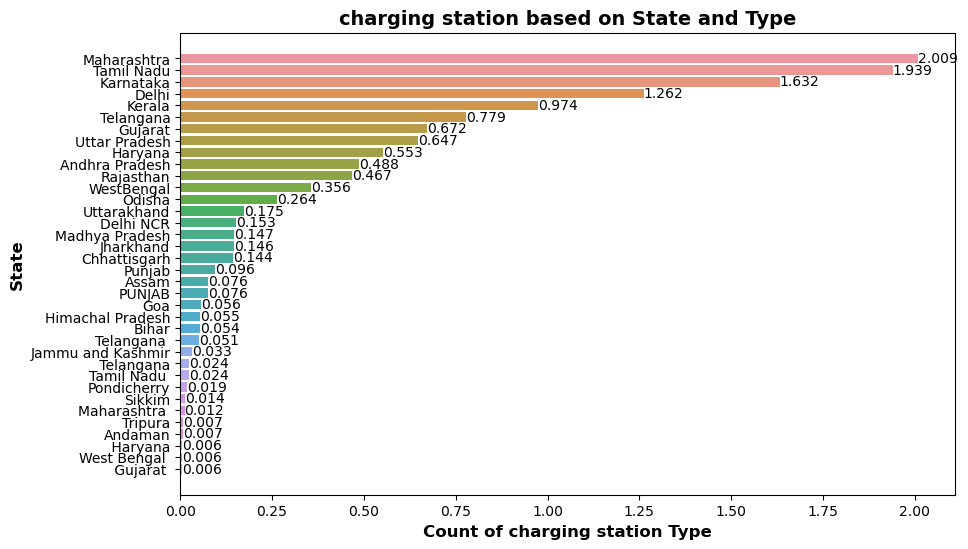

In [137]:
plt.subplots(figsize=(10, 6))
df_state_type = (
    station_df.groupby("state")["type"]
    .sum()
    .div(1000)
    .reset_index()
    .sort_values(by="type", ascending=False)
    .reset_index(drop=True)
)
ax = sns.barplot(data=df_state_type, x="type", y="state")
ax.bar_label(ax.containers[0], label_type="edge")
plt.title(
    f"charging station based on State and Type",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Count of charging station Type", fontsize=12, fontweight="bold")
plt.ylabel(
    "State",
    fontsize=12,
    fontweight="bold",
)
plt.plot()

In [138]:
# Above chart depicts Maharashtra ,Tamil Nadu hse mos countt types  Haryana,West bengal has less charging station type count

[]

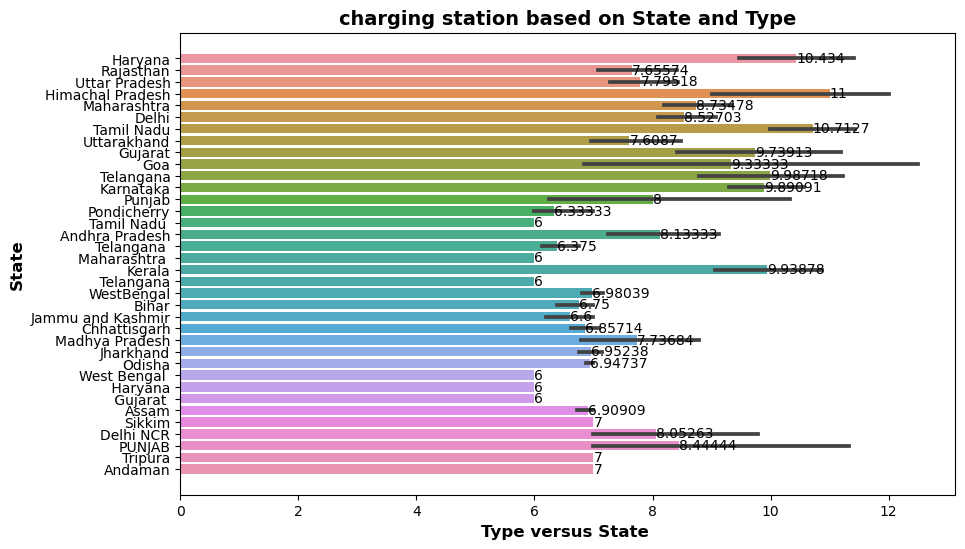

In [139]:
plt.subplots(figsize=(10, 6))

ax = sns.barplot(data=station_df, x="type", y="state")
ax.bar_label(ax.containers[0], label_type="edge")
plt.title(
    f"charging station based on State and Type",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Type versus State ", fontsize=12, fontweight="bold")
plt.ylabel(
    "State",
    fontsize=12,
    fontweight="bold",
)
plt.plot()

In [140]:
# station_df['longitude']=station_df['longitude'].astype(int)
# station_df['type']=station_df['type'].astype(int)
# station_df['lattitude']=station_df['lattitude'].astype(int)

In [141]:
station_df.head()

name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

   lattitude  longitude  type  
0    29.6019    76.9803  12.0  
1    28.4673    77.0818  12.0  
2    27.8751    76.2760  12.0  
3    29.3105    77.7218  12.0  
4    29.3105    77.7218  12.0

In [149]:
station_df_data=station_df.iloc[:,3:]


In [150]:
MD_pca=PCA(station_df_data)

In [144]:
from sklearn.preprocessing import StandardScaler


In [153]:
MD_pca = PCA().fit(station_df_data)  # Create and fit PCA model


# Extract component information
components = pd.DataFrame(MD_pca.components_.T)  # Transpose for row-wise components
std_dev = MD_pca.singular_values_
explained_variance = MD_pca.explained_variance_ratio_
 
# Create DataFrame with desired columns and labels
df_summary = pd.DataFrame({ 
    "PC": ["PC1", "PC2","P3"],
    "Standard Deviation": std_dev,
    "Proportion of Variance": explained_variance,
    "Cumulative Proportion": np.cumsum(explained_variance)
})
 
# Print the DataFrame with column labels

df_summary=df_summary.to_string(index=False)
print(df_summary)

 PC  Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1          274.210388                0.558906               0.558906
PC2          187.636845                0.261702               0.820607
 P3          155.352006                0.179393               1.000000


In [154]:
# Assuming 'MD.pca' is your fitted PCA object and 'components_' stores the loadings
rotation_matrix = np.round(MD_pca.components_.T, 1)  # Round to one decimal place and transpose

# Create a DataFrame for better presentation (optional)
df = pd.DataFrame(rotation_matrix)
# print(df.to_string())  # Prints the DataFrame with column and row indices# Assuming 'MD.pca' is your fitted PCA object and 'components_' stores the loadings
rotation_matrix = np.round(MD_pca.components_.T, 1)  # Round to one decimal place and transpose

# Create a DataFrame for better presentation (optional)
df = pd.DataFrame(rotation_matrix)
print(df.to_string())  # Prints the DataFrame with column and row indices

     0    1    2
0  1.0 -0.1 -0.2
1 -0.2 -1.0 -0.3
2 -0.1  0.3 -1.0


In [155]:
new_index = station_df.iloc[:,3:].columns.tolist()

In [156]:
new_index

['lattitude', 'longitude', 'type']

In [47]:
# station_df = station_df_data.set_axis(new_index, axis=0 )  # Set axis 0 for rows
# station_df= station_df.rename(columns={0:"PC1", 1:"PC2", 2:"PC3"})
# print(station_df)

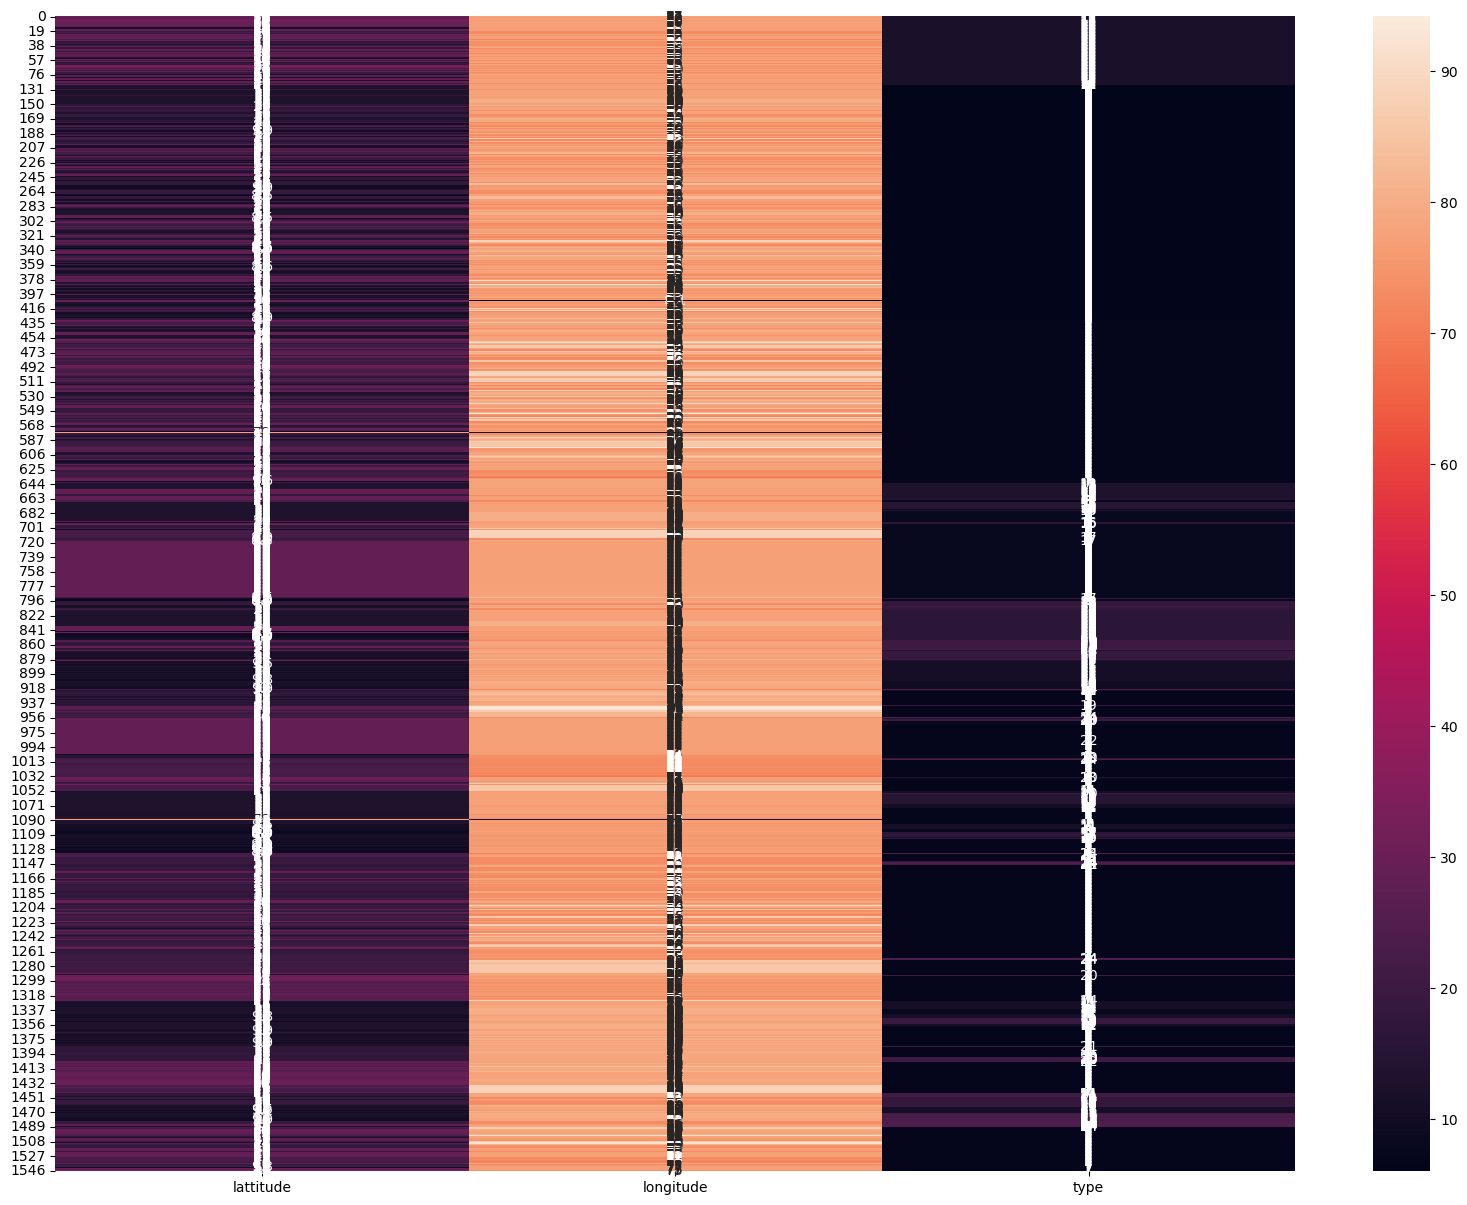

In [157]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(station_df_data, annot=True)
plt.show()

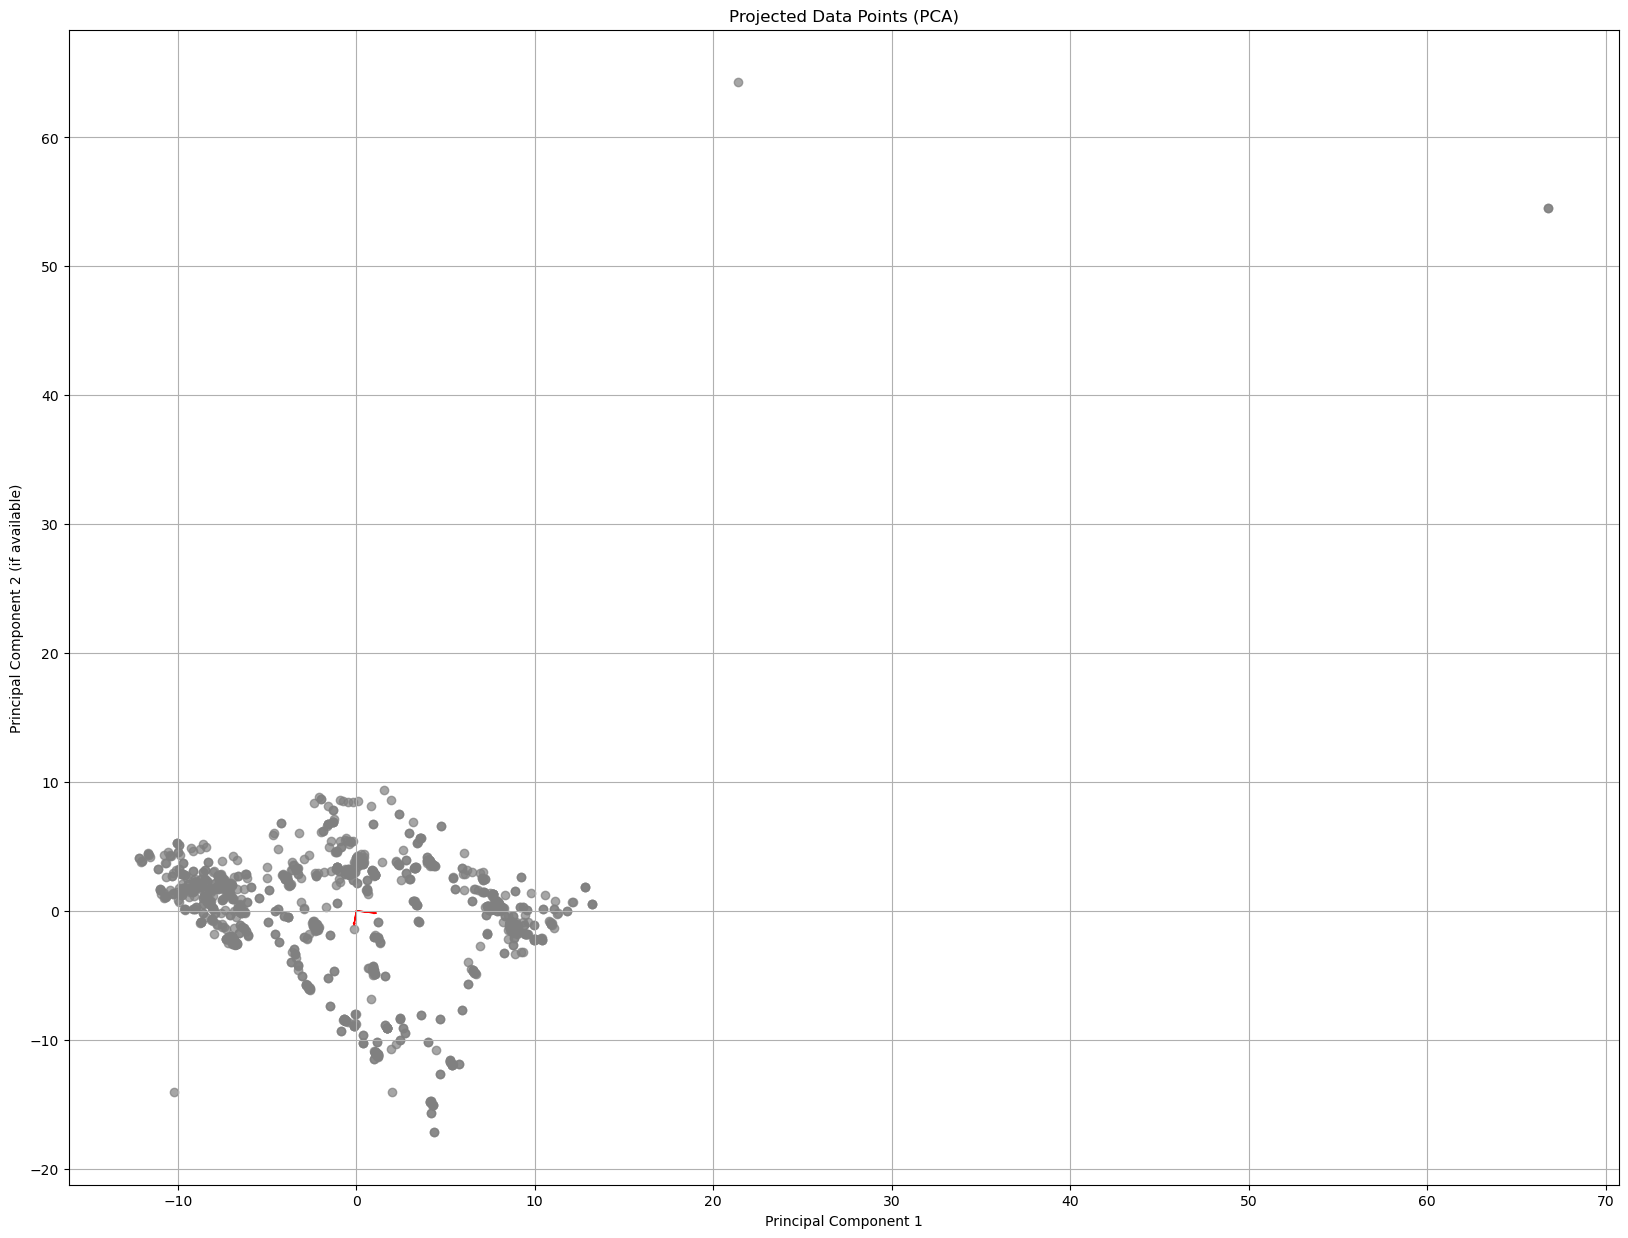

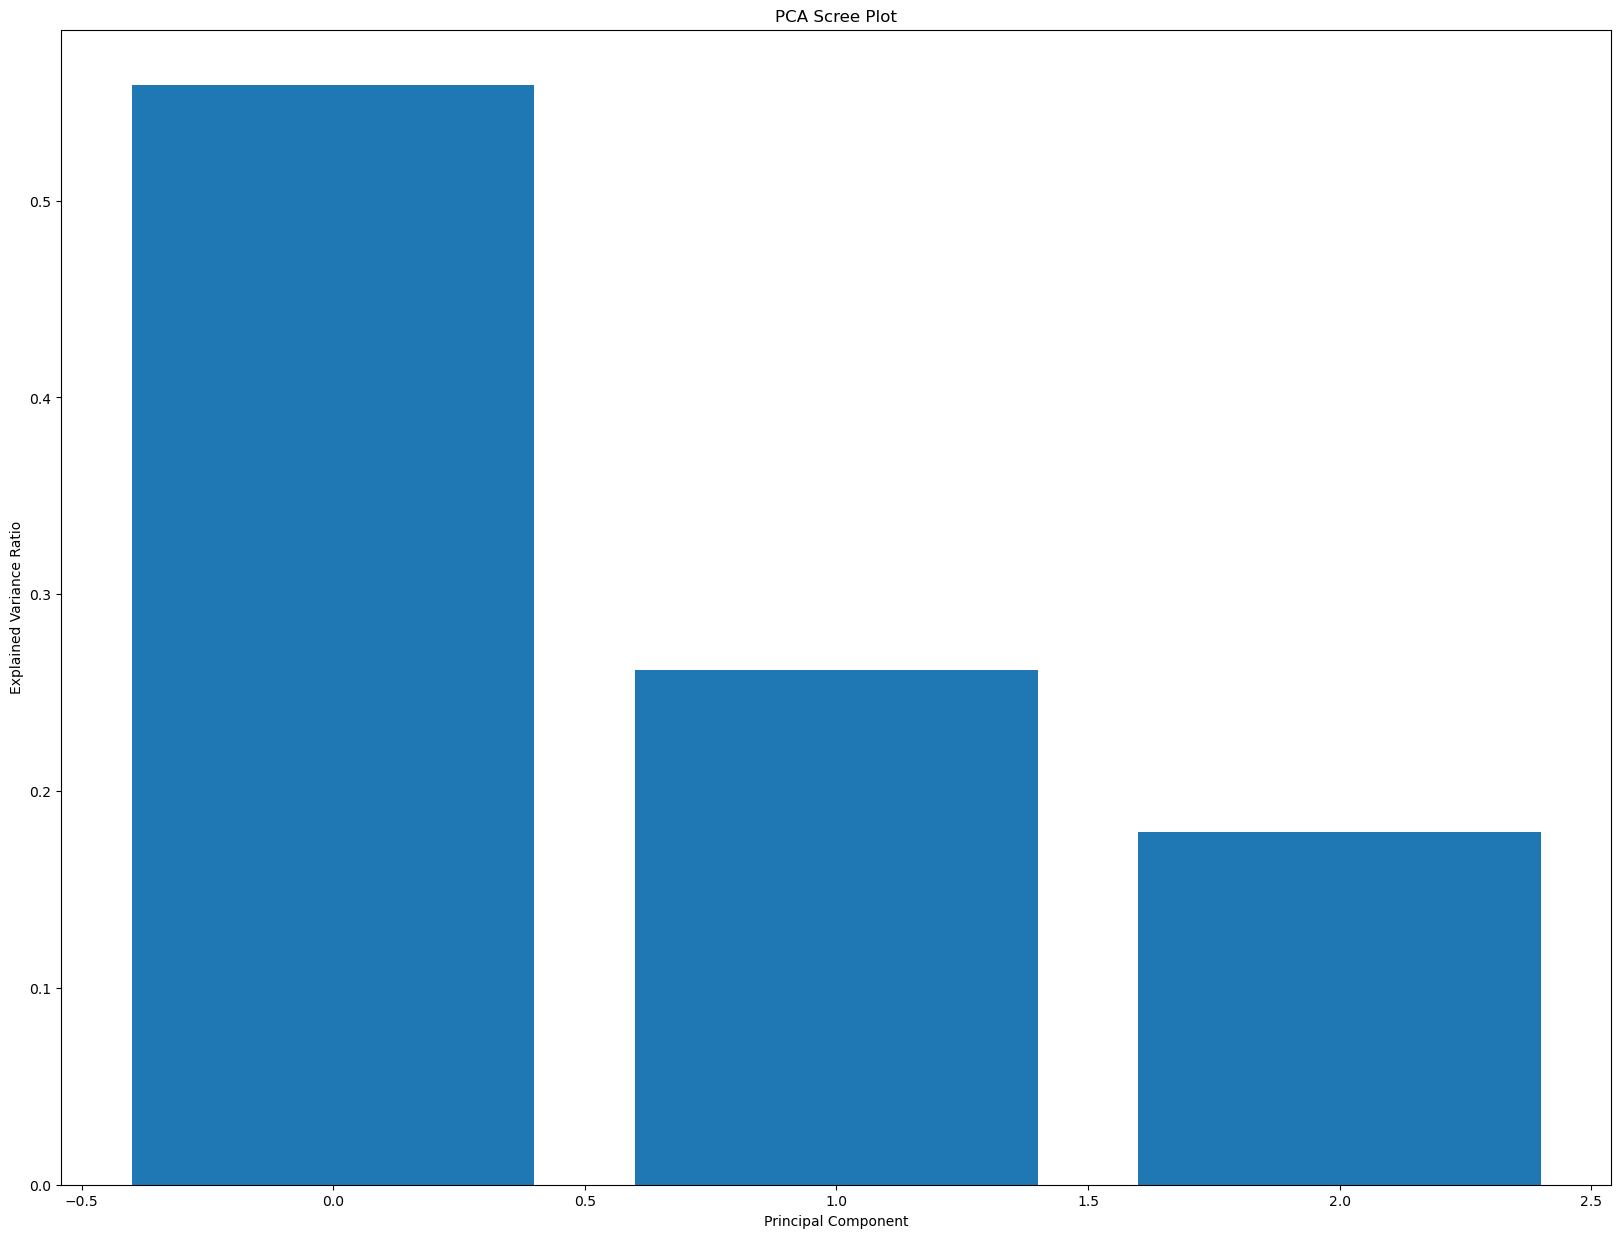

In [158]:
import matplotlib.pyplot as plt

# ... (your PCA code, assuming MD_pca is assigned if PCA is performed)

if MD_pca is not None:
  projected_data = MD_pca.transform(station_df_data)

  # Plot projected data points
  plt.scatter(projected_data[:, 0], projected_data[:, 1], c='grey', alpha=0.7)

  # Visualize principal components (using components and explained_variance_ratio_)
  components = MD_pca.components_
  for i in range(min(len(components), 2)):  # Plot at most the first two components
    plt.arrow(0, 0, components[i, 0], components[i, 1], color='red', head_width=0.1)  # Adjust arrow properties

  # Plot first two components (or less if fewer components exist)
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2 (if available)")
  plt.title("Projected Data Points (PCA)")
  plt.grid(True)
  plt.show()

  # Optional: Visualize explained variance using PCA scree plot
  plt.bar(range(len(MD_pca.explained_variance_ratio_)), MD_pca.explained_variance_ratio_)
  plt.xlabel("Principal Component")
  plt.ylabel("Explained Variance Ratio")
  plt.title("PCA Scree Plot")
  plt.show()

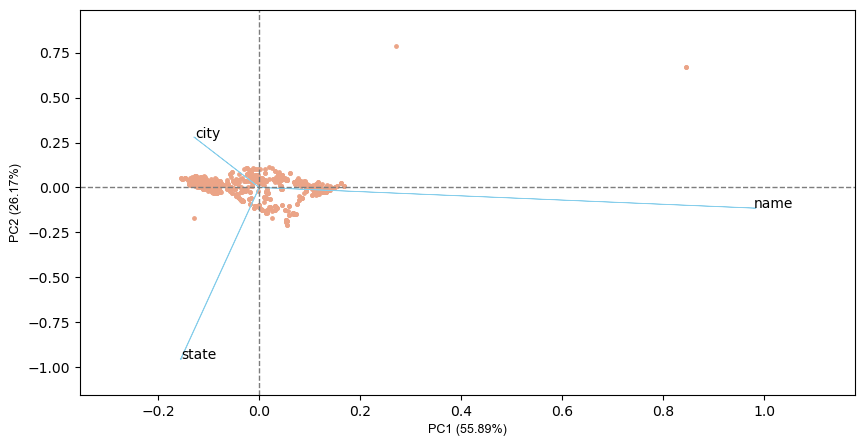

In [159]:
# get PC scores
pca_scores = PCA().fit_transform(station_df_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=MD_pca.components_, labels=station_df.columns.values, var1=round(MD_pca.explained_variance_ratio_[0]*100, 2),
    var2=round(MD_pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))


In [51]:
# Step 5: Extracting Segments

In [52]:
 
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score 

In [53]:
station_df_geo=station_df.iloc[:,3:5]

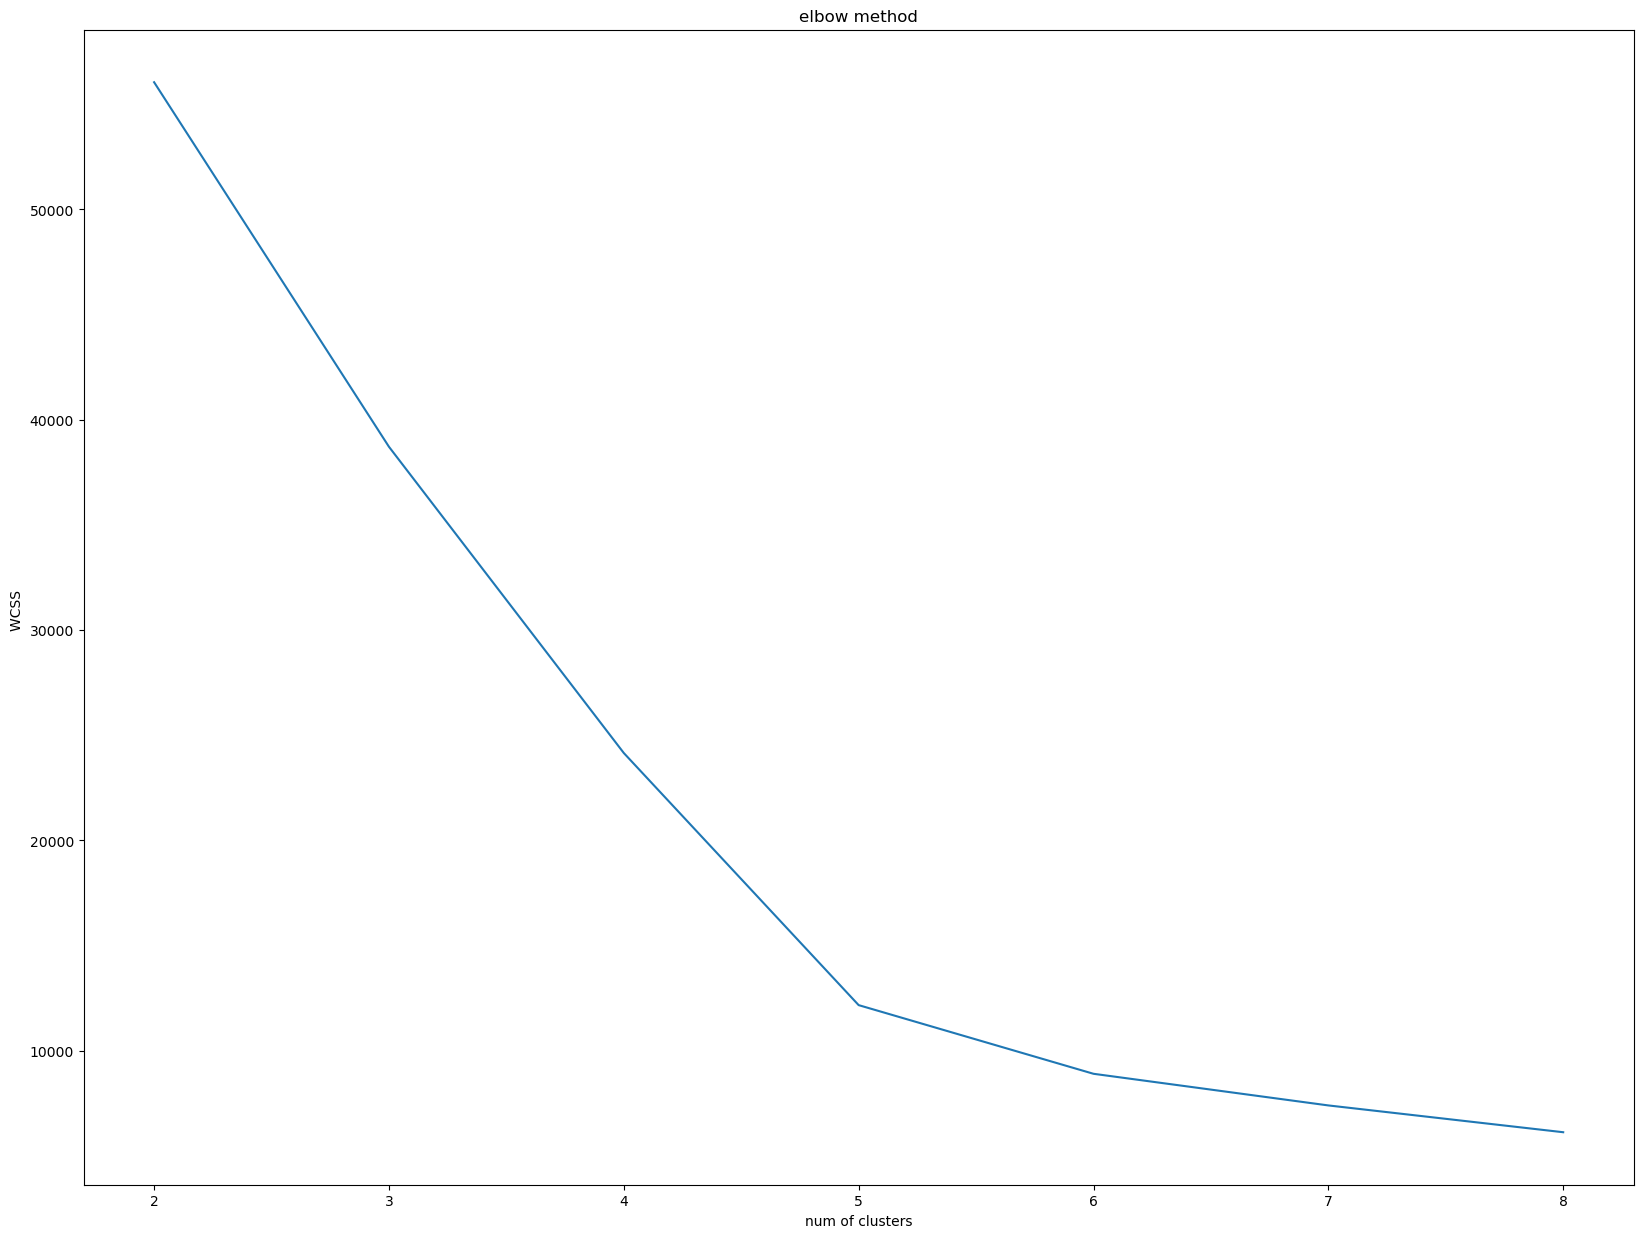

In [54]:
from sklearn.cluster import KMeans
wcss=[]
MD_km28={}
for i in range(2,9):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=1234)
    kmeans.fit(station_df_geo)
    wcss.append(kmeans.inertia_)
    MD_km28[str(i)] = kmeans
plt.plot(range(2,9),wcss) 
plt.title("elbow method")
plt.xlabel("num of clusters")
plt.ylabel("WCSS ")
plt.show() 

In [55]:
kmeans=KMeans(n_clusters=6,init='k-means++',n_init=10,random_state=1234)
y_kmeans=kmeans.fit_predict(station_df_geo)

In [56]:
print(y_kmeans.tolist())

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 1, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 5, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 1, 1, 4, 2, 4, 2, 1, 1, 4, 5, 2, 2, 2, 2, 4, 1, 2, 4, 2, 4, 4, 4, 1, 4, 2, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 2, 1, 5, 5, 5, 4, 5, 5, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 5, 1, 5, 4, 1, 1, 1, 4, 4, 1, 4, 1, 5, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 0, 1, 4, 4, 1, 4, 4, 4, 2, 4, 1, 1, 1, 2, 4, 4, 4, 2, 2, 5, 5, 4, 1, 1, 2, 4, 4, 2, 4, 1, 4, 1, 1, 2, 4, 1, 1, 2, 2, 4, 2, 2, 1, 1, 1, 1, 4, 2, 2, 2, 1, 5, 5, 1, 5, 1, 5, 4, 4, 5, 5, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 1, 4, 1, 5, 5, 5, 1, 1, 1, 4, 4, 1, 1, 4, 1, 2, 2, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 4, 4, 5, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 5, 1, 1, 5, 1, 5, 4, 4, 2, 4, 4, 1, 1, 4, 0, 0, 1, 5, 2, 4, 2, 4, 1, 1, 1, 1, 5, 2, 2, 2, 2, 2, 1, 0, 5, 5, 5, 2, 1, 5, 4, 1, 4, 4, 1, 4, 4, 1, 1, 1, 5, 4, 4, 1, 1, 1, 

In [57]:
station_df['y']=y_kmeans

In [58]:
station_df.head()

name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

   lattitude  longitude  type  y  
0    29.6019    76.9803  12.0  2  
1    28.4673    77.0818  12.0  2  
2    27.8751    76.2760  12.0  2  
3    29.3105    77.7218  12.0  2  
4    29.3105    77.7218  12.0  2

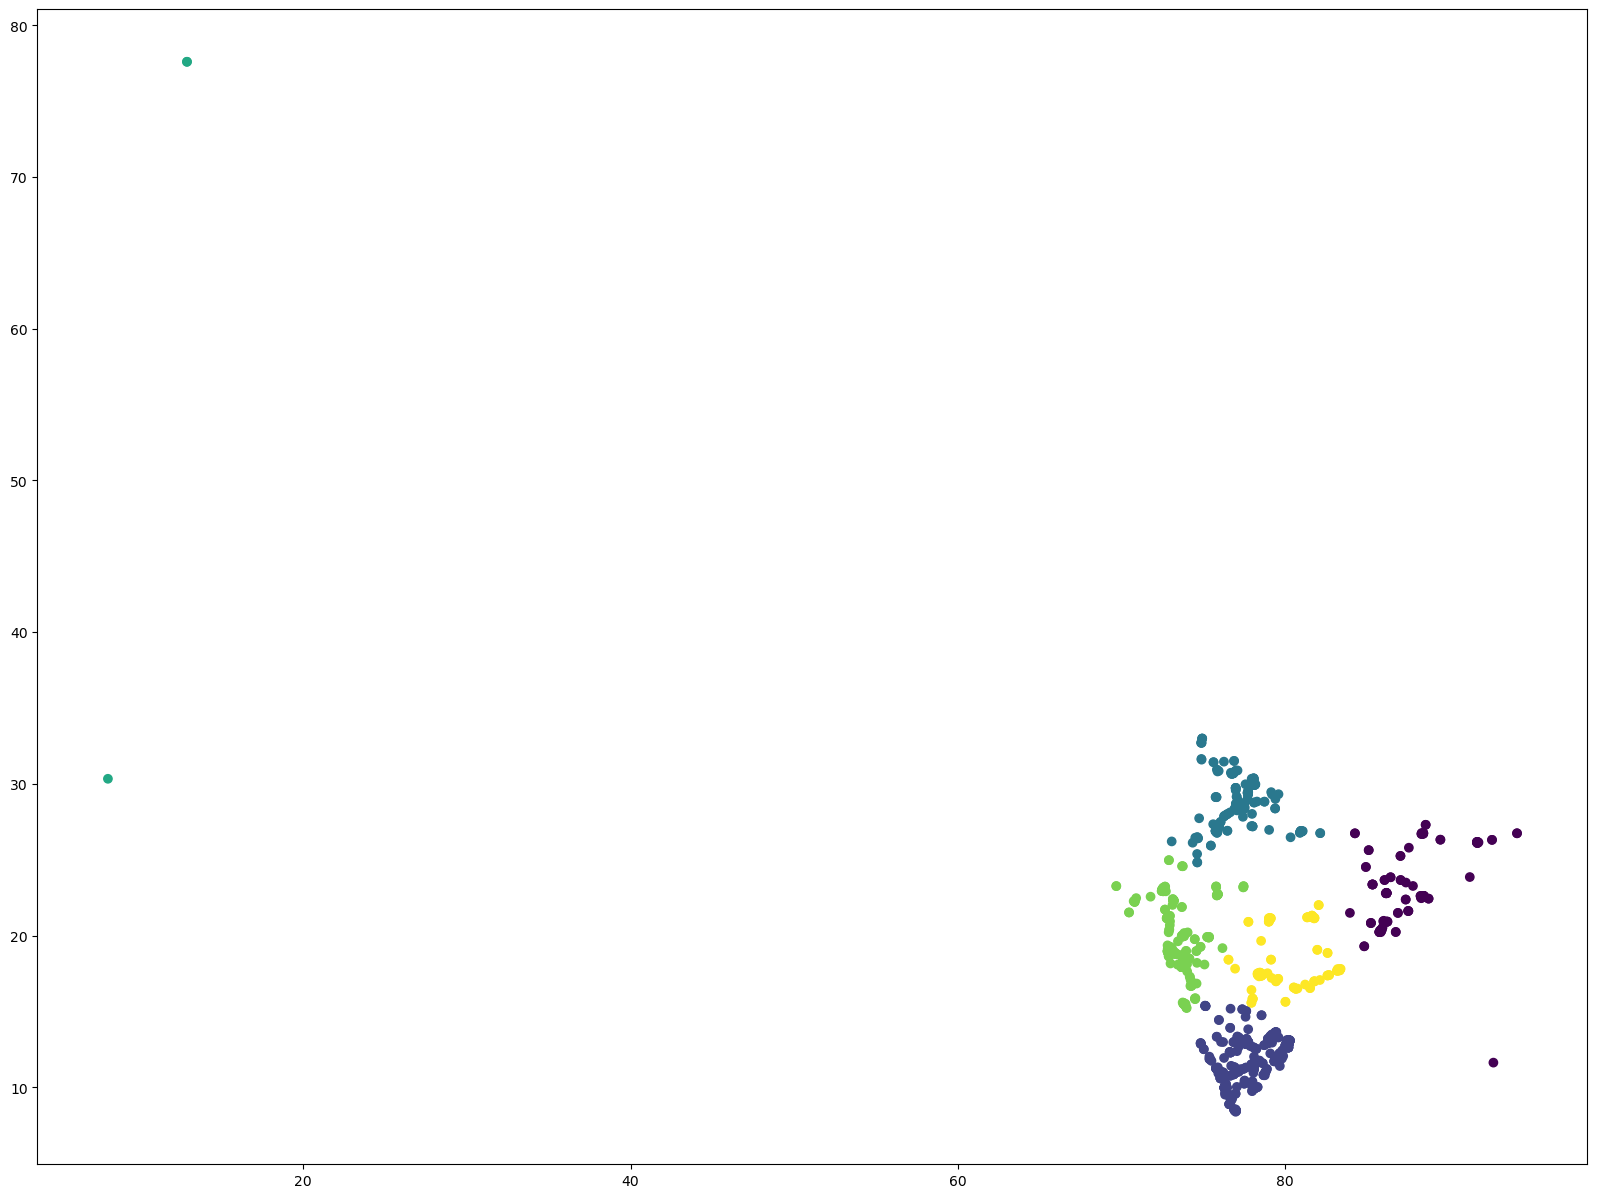

In [59]:
plt.scatter(station_df.longitude,station_df.lattitude,c=station_df.y)

In [60]:
kmeans.inertia_

8903.767672222268

In [61]:
station_df.head(1)

name    state      city  lattitude  \
0  Neelkanth Star DC Charging Station  Haryana  Gurugram    29.6019   

   longitude  type  y  
0    76.9803  12.0  2

In [62]:
cluster1=station_df[['lattitude','longitude']][station_df['y']==0].values.tolist()
cluster2=station_df[['lattitude','longitude']][station_df['y']==1].values.tolist()
cluster3=station_df[['lattitude','longitude']][station_df['y']==2].values.tolist()
cluster4=station_df[['lattitude','longitude']][station_df['y']==3].values.tolist()
cluster5=station_df[['lattitude','longitude']][station_df['y']==4].values.tolist()
cluster6=station_df[['lattitude','longitude']][station_df['y']==5].values.tolist()
cluster7=station_df[['lattitude','longitude']][station_df['y']==6].values.tolist()

In [63]:
import folium
map = folium.Map(location=[40.712,-72.006], zoom_start=10, tiles='openstreetmap')
map

In [64]:
for i in cluster1:
    folium.CircleMarker(i,radius=2,color='red',label='cluster 1').add_to(map)
for i in cluster2:
    folium.CircleMarker(i,radius=2,color='orange',label='cluster2 ').add_to(map)
for i in cluster3:
    folium.CircleMarker(i,radius=2,color='yellow',label='cluster 3').add_to(map)
for i in cluster4:
    folium.CircleMarker(i,radius=2,color='cyan',label='cluster 4').add_to(map)
for i in cluster5:
    folium.CircleMarker(i,radius=2,color='green',label='cluster 5').add_to(map)
for i in cluster6:
    folium.CircleMarker(i,radius=2,color='blue',label='cluster 6').add_to(map)
# for i in cluster7:
#     folium.CircleMarker(i,radius=2,color='grey',label='cluster 7').add_to(map)

In [65]:
map

In [66]:
# Cluster based on longitude and latitidue

In [67]:
# version 2

In [68]:
station_df_geo1=station_df.iloc[:,3:6]

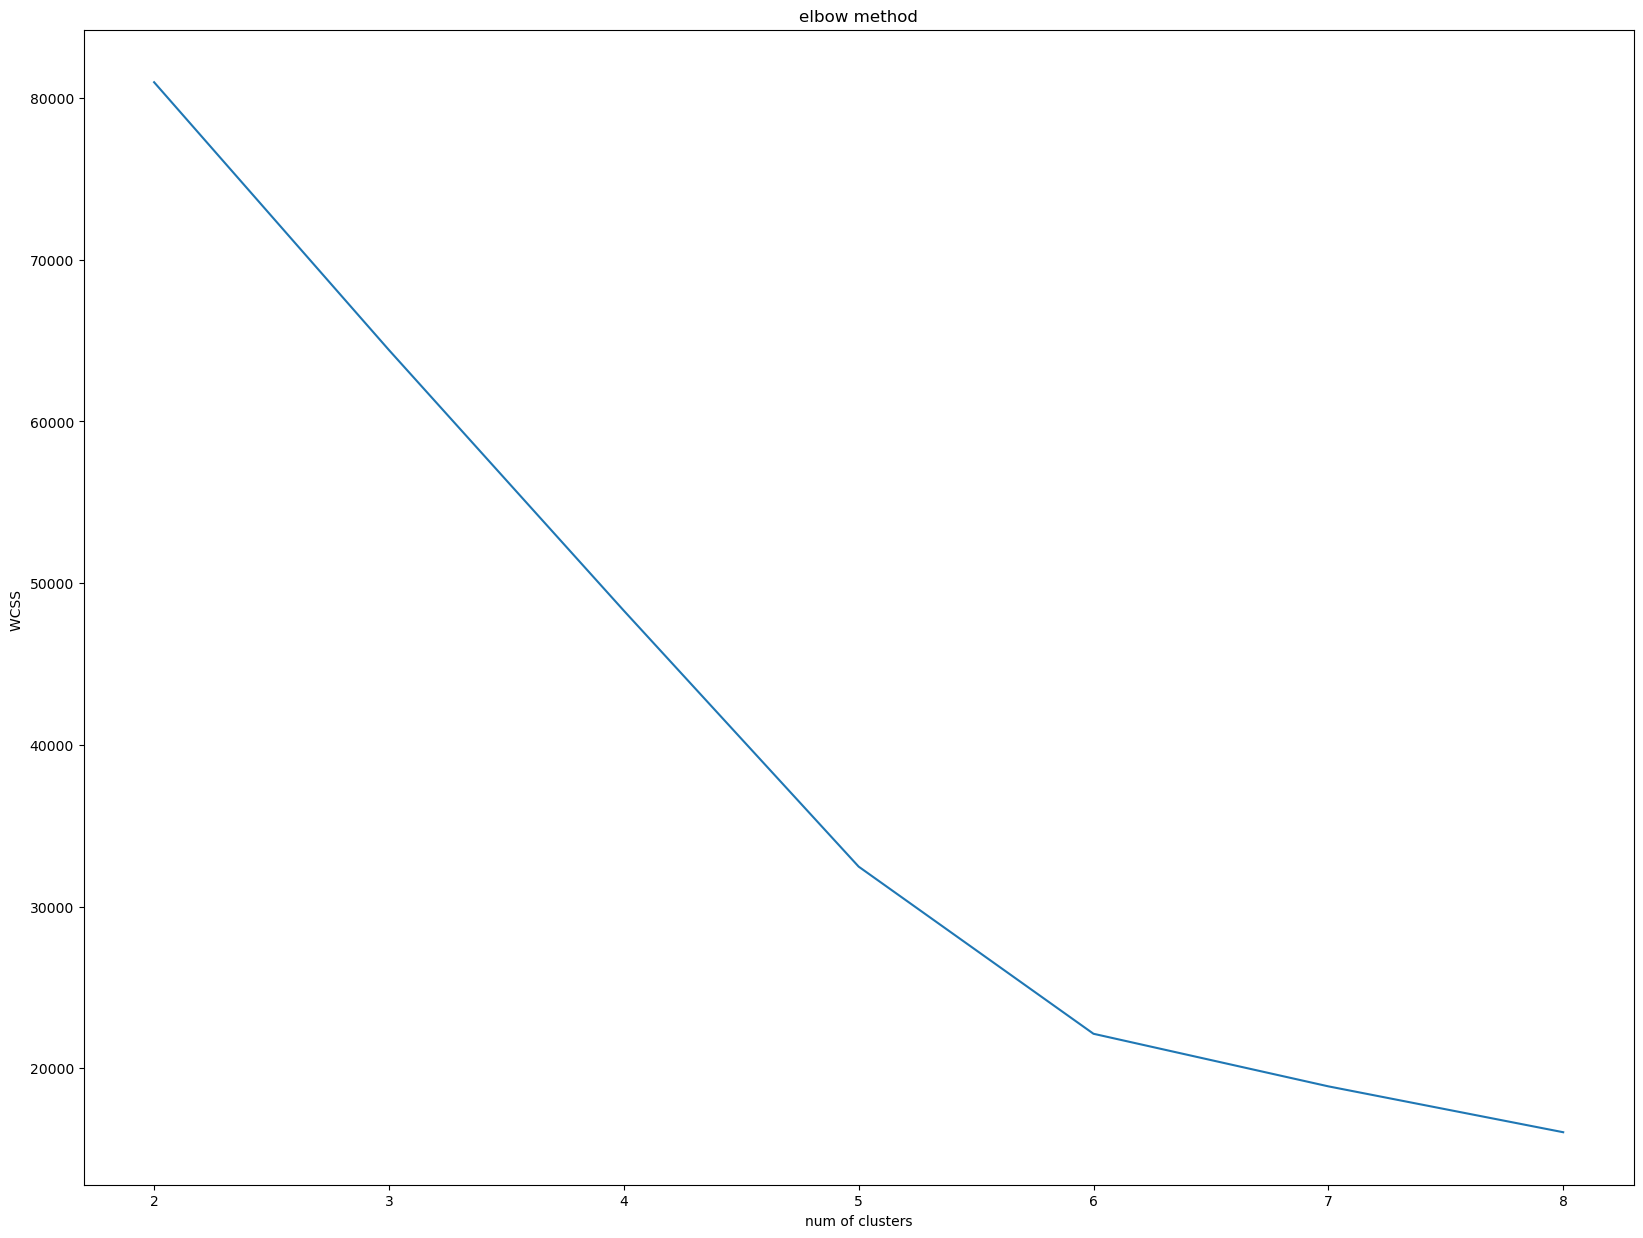

In [69]:
from sklearn.cluster import KMeans
wcss=[]
MD_km28={}
for i in range(2,9):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=42)
    kmeans.fit(station_df_geo1)
    wcss.append(kmeans.inertia_)
    MD_km28[str(i)] = kmeans
plt.plot(range(2,9),wcss) 
plt.title("elbow method")
plt.xlabel("num of clusters")
plt.ylabel("WCSS ")
plt.show() 

In [70]:
kmeans=KMeans(n_clusters=6,init='k-means++',n_init=10,random_state=1234)
y_kmeans1=kmeans.fit_predict(station_df_geo1)

In [71]:
print(y_kmeans1.tolist())

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 2, 2, 4, 4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 0, 2, 0, 0, 4, 2, 0, 0, 4, 4, 0, 0, 4, 0, 4, 4, 4, 4, 2, 2, 0, 4, 0, 4, 2, 2, 0, 2, 4, 4, 4, 4, 0, 2, 4, 0, 4, 0, 0, 0, 2, 0, 4, 4, 2, 4, 0, 4, 2, 4, 0, 4, 0, 4, 4, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 3, 2, 0, 0, 2, 0, 0, 0, 4, 0, 2, 2, 2, 4, 0, 0, 0, 4, 4, 3, 3, 0, 2, 2, 4, 0, 0, 4, 0, 2, 0, 2, 2, 4, 0, 2, 2, 4, 4, 0, 4, 4, 2, 2, 2, 2, 0, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 3, 3, 3, 2, 2, 2, 0, 0, 2, 2, 0, 2, 4, 4, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 0, 0, 3, 4, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 2, 2, 2, 2, 2, 2, 0, 0, 4, 0, 0, 2, 2, 0, 3, 3, 2, 3, 4, 0, 4, 0, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 3, 3, 0, 0, 4, 2, 3, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 

In [72]:
# plt.scatter(station_df_geo1[y_kmeans1==1,0],station_df_geo1[y_kmeans1==1,1],s=100,c='red',label='cluster 2')
# plt.scatter(station_df_geo1[y_kmeans1==2,0],station_df_geo1[y_kmeans1==2,1],s=100,c='blue',label='cluster 3')
# plt.scatter(station_df_geo1[y_kmeans1==3,0],station_df_geo1[y_kmeans1==3,1],s=100,c='cyan',label='cluster 4')
# plt.scatter(station_df_geo1[y_kmeans1==4,0],station_df_geo1[y_kmeans1==4,1],s=100,c='yellow',label='cluster 5')
# # plt.scatter(station_df[y_kmeans1==5,0],station_df[y_kmeans1==5,1],s=100,c='green',label='cluster 6')
# # plt.scatter(station_df[y_kmeans1==6,0],station_df[y_kmeans1==6,1],s=100,c='pink',label='cluster 7')
# # plt.scatter(station_df[y_kmeans1==7,0],station_df[y_kmeans1==7,1],s=100,c='magenta',label='cluster 8')
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='centroids')

In [73]:
station_df['y2']=y_kmeans1

In [74]:
station_df.head()

name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

   lattitude  longitude  type  y  y2  
0    29.6019    76.9803  12.0  2   4  
1    28.4673    77.0818  12.0  2   4  
2    27.8751    76.2760  12.0  2   4  
3    29.3105    77.7218  12.0  2   4  
4    29.3105    77.7218  12.0  2   4

In [75]:
station_df[station_df['y2']==5]['state'].unique().tolist()

['Delhi', 'Karnataka']

In [76]:
station_df[station_df['y2']==5]

name      state       city  lattitude  \
405          Ather Space - Dehradun      Delhi   dehradun  30.338256   
577   Key Motors, Bannerghatta Road  Karnataka  Bangalore  77.597289   
1089  Key Motors, Bannerghatta Road  Karnataka  Bangalore  77.597289   

      longitude  type  y  y2  
405    8.058454   6.0  3   5  
577   12.889141   7.0  3   5  
1089  12.889141   7.0  3   5

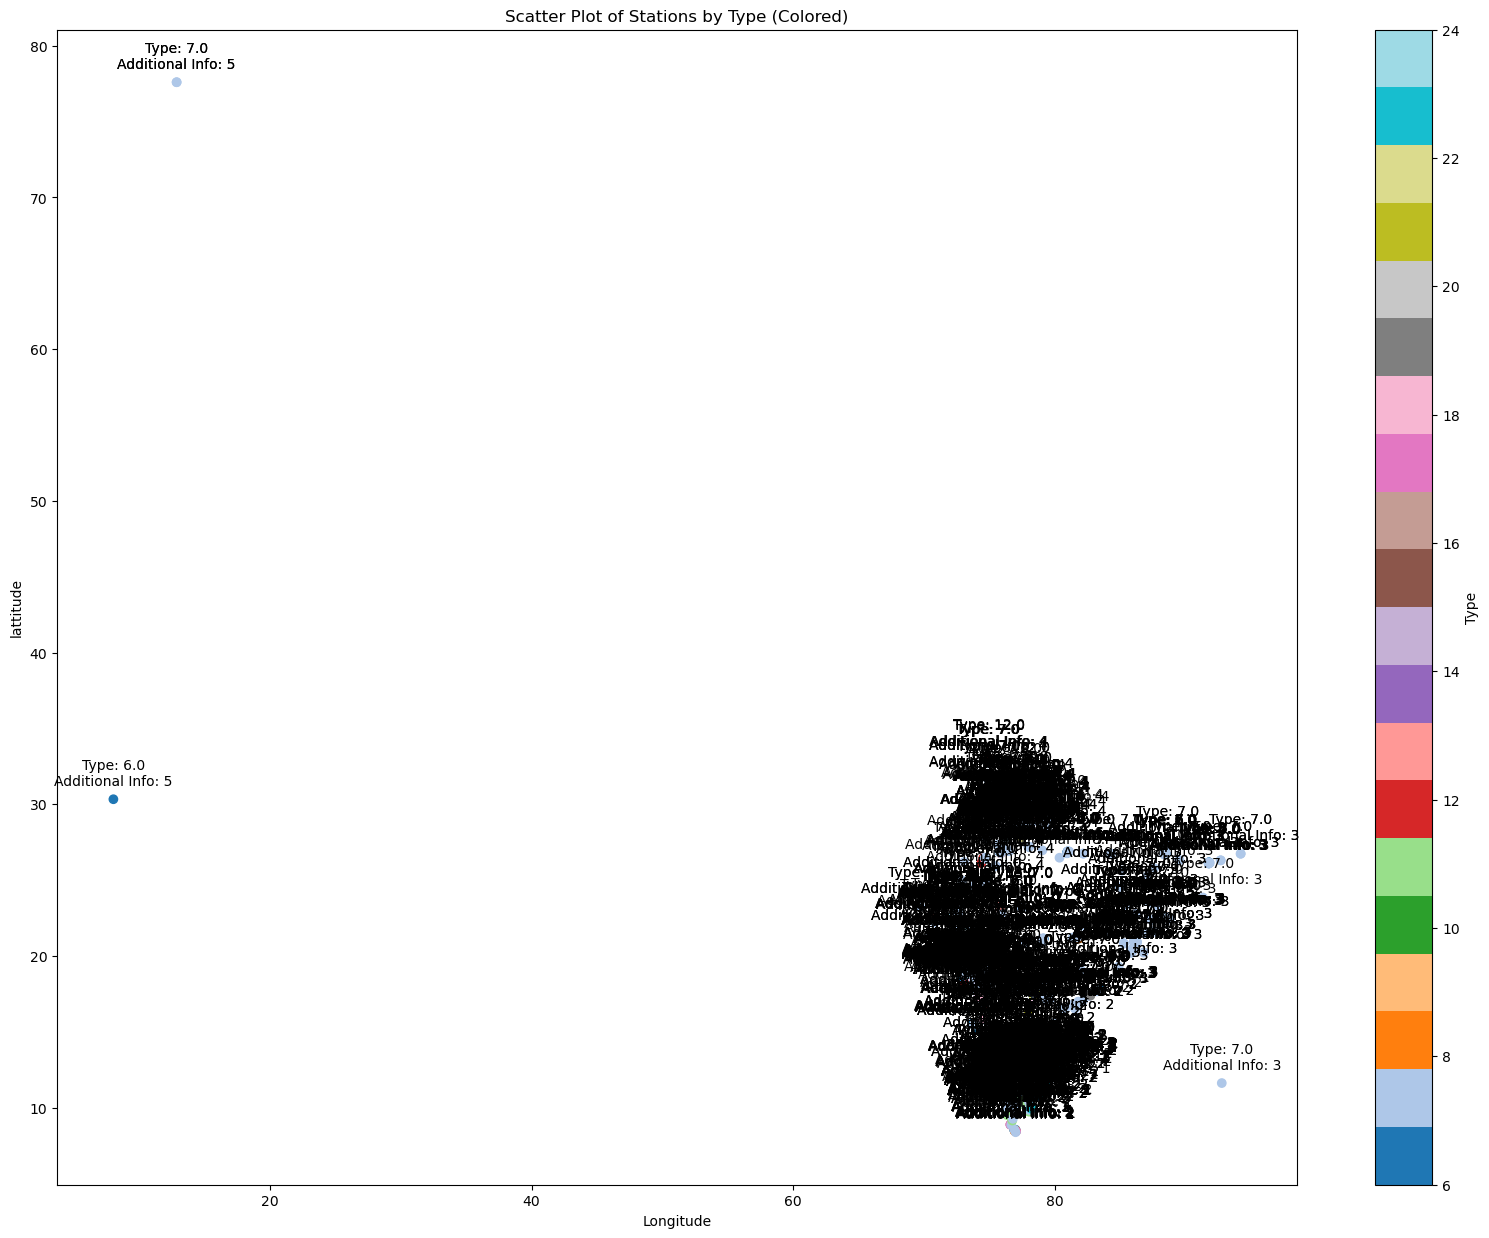

In [77]:
plt.scatter(station_df.longitude, station_df.lattitude, c=station_df['type'], cmap='tab20')

# Add annotations with tooltips
for i, row in station_df.iterrows():
  x = row['longitude']
  y = row['lattitude']
  tooltip = f"Type: {row['type']}\nAdditional Info: {row['y2']}"
  plt.annotate(tooltip, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('lattitude')
plt.title('Scatter Plot of Stations by Type (Colored)')

# Optional: Add legend if using a colormap for 'type'
plt.colorbar(label='Type')

plt.show()

In [78]:
cluster_T1=station_df[['lattitude','longitude']][station_df['y2']==0].values.tolist()
cluster_T2=station_df[['lattitude','longitude']][station_df['y2']==1].values.tolist()
cluster_T3=station_df[['lattitude','longitude']][station_df['y2']==2].values.tolist()
cluster_T4=station_df[['lattitude','longitude']][station_df['y2']==3].values.tolist()
cluster_T5=station_df[['lattitude','longitude']][station_df['y2']==4].values.tolist()
cluster_T6=station_df[['lattitude','longitude']][station_df['y2']==5].values.tolist()
cluster_T7=station_df[['lattitude','longitude']][station_df['y2']==6].values.tolist()

In [79]:
for i in cluster_T1:
    folium.CircleMarker(i,radius=2,color='red',label='cluster 1').add_to(map)
for i in cluster_T2:
    folium.CircleMarker(i,radius=2,color='orange',label='cluster2 ').add_to(map)
for i in cluster_T3:
    folium.CircleMarker(i,radius=2,color='yellow',label='cluster 3').add_to(map)
for i in cluster_T4:
    folium.CircleMarker(i,radius=2,color='cyan',label='cluster 4').add_to(map)
for i in cluster_T5:
    folium.CircleMarker(i,radius=2,color='green',label='cluster 5').add_to(map)
for i in cluster_T6:
    folium.CircleMarker(i,radius=2,color='light green',label='cluster 6').add_to(map)
for i in cluster_T7:
    folium.CircleMarker(i,radius=2,color='grey',label='cluster 7').add_to(map)

In [80]:
map

cluster based on type
 ['Karnataka',
 'Telangana',
 'Kerala',
 'Maharashtra',
 'Tamil Nadu',
 'Gujarat',
 'Goa',
 'Andhra Pradesh',
 'Rajasthan',
 'Uttar Pradesh'] are the places with type [13.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 24.0, 23.0] which is spread in most part of inda

Based on above figure south india has built good EV charging infrastructures.

Lack of charging station in few parts of central india and west india near to borders might create anxiety in people in buying.
EV.

Most Tropical Forest regions EV charging infrastructures are not built. 

In [81]:
station_df[station_df['y2']==1].type.unique().tolist()

[13.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 24.0, 23.0]

In [82]:
# cluster 2 is spread in most part of india and their are only 5 clusters plotted based on type on the map
station_df_filtered=station_df.iloc[:,:-2]

In [83]:
## Filtering out the warnings.
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['state']  # List of categorical columns
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(station_df_filtered[categorical_cols])

# Convert sparse matrix to dense array
encoded_features_array = encoded_features.toarray().astype(int)

# Concatenate the encoded features with the remaining DataFrame
encoded_df = pd.concat([station_df_filtered.drop(categorical_cols, axis=1), pd.DataFrame(encoded_features_array)], axis=1)

In [84]:
encoded_df

name      city  lattitude  \
0                    Neelkanth Star DC Charging Station  Gurugram    29.6019   
1                          Galleria DC Charging Station  Gurugram    28.4673   
2     Highway Xpress (Jaipur-Delhi) DC charging station    Behror    27.8751   
3                     Food Carnival DC Charging Station  Khatauli    29.3105   
4                     Food Carnival AC Charging Station  Khatauli    29.3105   
...                                                 ...       ...        ...   
812                                                 NaN       NaN        NaN   
813                                                 NaN       NaN        NaN   
814                                                 NaN       NaN        NaN   
884                                                 NaN       NaN        NaN   
1036                                                NaN       NaN        NaN   

      longitude  type    0    1    2    3    4  ...   26   27   28   29   30  \
0       76.9803  12.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
1       77.0818  12.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
2       76.2760  12.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
3       77.7218  12.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
4       77.7218  12.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
...         ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
812         NaN   NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
813         NaN   NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
814         NaN   NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0   
884         NaN   NaN  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0   
1036        NaN   NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   

       31   32   33   34   35  
0     0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  
3     0.0  1.0  0.0  0.0  0.0  
4     0.0  1.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  
812   0.0  0.0  0.0  0.0  0.0  
813   0.0  0.0  0.0  0.0  0.0  
814   0.0  0.0  0.0  0.0  0.0  
884   0.0  0.0  0.0  0.0  0.0  
1036  0.0  0.0  0.0  0.0  0.0  

[1547 rows x 41 columns]

In [85]:
station_df_filtered['state'].unique()

array(['Haryana', 'Rajasthan', 'Uttar Pradesh', 'Himachal Pradesh',
       'Maharashtra', 'Delhi', 'Tamil Nadu', 'Uttarakhand', 'Gujarat',
       'Goa', 'Telangana', 'Karnataka', 'Punjab', 'Pondicherry',
       'Tamil Nadu ', 'Andhra Pradesh', 'Telangana ', 'Maharashtra ',
       'Kerala', ' Telangana', 'WestBengal', 'Bihar', 'Jammu and Kashmir',
       'Chhattisgarh', 'Madhya Pradesh', 'Jharkhand', 'Odisha',
       'West Bengal ', ' Haryana', ' Gujarat ', 'Assam', 'Sikkim',
       'Delhi NCR', 'PUNJAB', 'Tripura', 'Andaman'], dtype=object)

In [86]:
 state_names = ['Haryana', 'Rajasthan', 'Uttar Pradesh', 'Himachal Pradesh',
              'Maharashtra', 'Delhi', 'Tamil Nadu', 'Uttarakhand', 'Gujarat',
              'Goa', 'Telangana', 'Karnataka', 'Punjab', 'Odisha', 'Pondicherry',
              'TamilNadu', 'Uttrakhand', 'WestBengal', 'Harayana', 'Chandigarh',
              'Hyderabadu00a0', 'Kerala', 'AndhraPradesh', 'TamiNadu',
              'Jharkhand', 'Bihar', 'West Bengal', 'Jammu', 'Andhra Pradesh',
              'Chhattisgarh', 'Madhya Pradesh', 'Andhra pradesh', 'Puducherry',
              'Jammu & Kashmir', 'Assam', 'Sikkim', 'Uttarakhand ', 'TAMIL NADU',
              'Andhra Pradesh ', 'Bhubhaneswar', 'Chattisgarh', 'chattisgarh',
              'Chikhali', 'Delhi NCR', 'Ernakulam', 'Hisar', 'Hyderabad',
              'Jajpur', 'Kochi', 'Limbdi', 'Maharashra', 'PUNJAB', 'Rajahmundry',
              'TELENGANA', 'Uttarkhand', 'Andra Pradesh', 'Karala', 'Tripura',
              'Andaman']

# Replace column names in 'df'
encoded_df.rename(columns={i: state_names[i - 1] for i in range(0, 59)}, inplace=True)

In [87]:
encoded_df

name      city  lattitude  \
0                    Neelkanth Star DC Charging Station  Gurugram    29.6019   
1                          Galleria DC Charging Station  Gurugram    28.4673   
2     Highway Xpress (Jaipur-Delhi) DC charging station    Behror    27.8751   
3                     Food Carnival DC Charging Station  Khatauli    29.3105   
4                     Food Carnival AC Charging Station  Khatauli    29.3105   
...                                                 ...       ...        ...   
812                                                 NaN       NaN        NaN   
813                                                 NaN       NaN        NaN   
814                                                 NaN       NaN        NaN   
884                                                 NaN       NaN        NaN   
1036                                                NaN       NaN        NaN   

      longitude  type  Andaman  Haryana  Rajasthan  Uttar Pradesh  \
0       76.9803  12.0      0.0      0.0        0.0            0.0   
1       77.0818  12.0      0.0      0.0        0.0            0.0   
2       76.2760  12.0      0.0      0.0        0.0            0.0   
3       77.7218  12.0      0.0      0.0        0.0            0.0   
4       77.7218  12.0      0.0      0.0        0.0            0.0   
...         ...   ...      ...      ...        ...            ...   
812         NaN   NaN      0.0      0.0        0.0            0.0   
813         NaN   NaN      0.0      0.0        0.0            0.0   
814         NaN   NaN      0.0      0.0        0.0            0.0   
884         NaN   NaN      0.0      0.0        0.0            0.0   
1036        NaN   NaN      0.0      0.0        0.0            0.0   

      Himachal Pradesh  ...  Bihar  West Bengal  Jammu  Andhra Pradesh  \
0                  0.0  ...    0.0          0.0    0.0             0.0   
1                  0.0  ...    0.0          0.0    0.0             0.0   
2                  0.0  ...    0.0          0.0    0.0             0.0   
3                  0.0  ...    0.0          0.0    0.0             0.0   
4                  0.0  ...    0.0          0.0    0.0             0.0   
...                ...  ...    ...          ...    ...             ...   
812                0.0  ...    0.0          0.0    0.0             0.0   
813                0.0  ...    0.0          0.0    0.0             0.0   
814                0.0  ...    0.0          0.0    0.0             1.0   
884                1.0  ...    0.0          0.0    0.0             0.0   
1036               0.0  ...    0.0          0.0    0.0             0.0   

      Chhattisgarh  Madhya Pradesh  Andhra pradesh  Puducherry  \
0              0.0             0.0             0.0         0.0   
1              0.0             0.0             0.0         0.0   
2              0.0             0.0             0.0         0.0   
3              0.0             0.0             1.0         0.0   
4              0.0             0.0             1.0         0.0   
...            ...             ...             ...         ...   
812            0.0             0.0             0.0         0.0   
813            0.0             0.0             0.0         0.0   
814            0.0             0.0             0.0         0.0   
884            0.0             0.0             0.0         0.0   
1036           0.0             0.0             0.0         0.0   

      Jammu & Kashmir  Assam  
0                 0.0    0.0  
1                 0.0    0.0  
2                 0.0    0.0  
3                 0.0    0.0  
4                 0.0    0.0  
...               ...    ...  
812               0.0    0.0  
813               0.0    0.0  
814               0.0    0.0  
884               0.0    0.0  
1036              0.0    0.0  

[1547 rows x 41 columns]

In [88]:
encoded_df.to_csv(r'C:\Users\VASU RAVILLA\Downloads\ev-charging-stations-india_refined.csv') 

In [89]:
encoded_df.to_excel(r'C:\Users\VASU RAVILLA\Downloads\ev-charging-stations-india_refined2.xlsx', index=False)


In [90]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# # List of categorical columns (assuming 'state')
# categorical_cols = ['state']

# # Fit the OneHotEncoder
# encoder = OneHotEncoder()
# encoded_features = encoder.fit_transform(station_df_filtered[categorical_cols])

# # Get the category names (class labels) from the encoder
# category_names = encoder.get_feature_names_out(categorical_cols)

# # Convert the encoded features to a DataFrame
# encoded_df = pd.DataFrame(encoded_features, columns=category_names)

# # Concatenate the encoded DataFrame with the remaining DataFrame
# final_df = pd.concat([station_df_filtered.drop(categorical_cols, axis=1), encoded_df], axis=1)

In [91]:
encoded_df_copy=encoded_df.copy()

In [92]:
encoded_df_copy_CS=encoded_df_copy.iloc[:,5:]

mean=round(encoded_df_copy_CS.mean(),2)
top_mean = mean.nlargest(7)
top_mean.keys()

Index(['Harayana', 'West Bengal', 'TamilNadu', 'Uttarakhand', 'Uttrakhand',
       'Andhra pradesh', 'Telangana'],
      dtype='object')

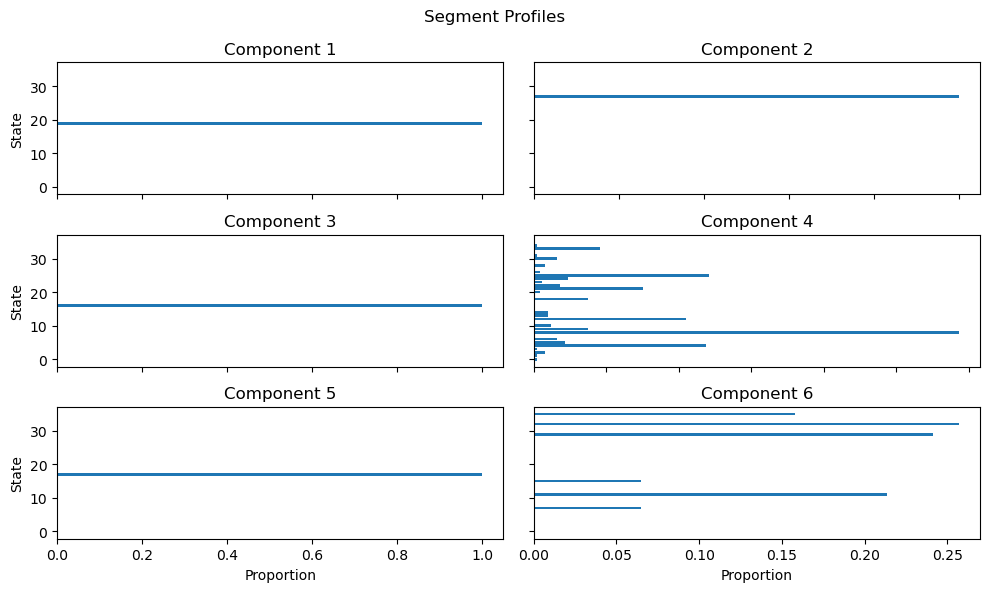

In [93]:
from sklearn.impute import SimpleImputer
columns=top_mean.keys()
# Impute missing values
imputer = SimpleImputer(strategy='mean')
encoded_df_copy_CS_imputed = imputer.fit_transform(encoded_df_copy_CS)

# Rest of your code using encoded_df_copy_CS_imputed
CS_KM = {}
within_cluster_distances = []
num_segments = range(1, 7)
for k in num_segments:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
  kmeans.fit(encoded_df_copy_CS_imputed)
  within_cluster_distances.append((kmeans.inertia_))
  CS_KM[str(k)] = kmeans
kmeans = CS_KM['6']

labels = kmeans.labels_
# encoded_df_copy_CS.groupby(labels).mean().nlargest(15,columns)
encoded_df_copy_CS_mean = encoded_df_copy_CS.groupby(labels).mean().nlargest(7,columns)
 
fig, axs = plt.subplots(3, 2, figsize=(10, 6))
axs[0, 0].barh(range(encoded_df_copy_CS_mean.shape[1]), encoded_df_copy_CS_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(encoded_df_copy_CS_mean.shape[1]), encoded_df_copy_CS_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(encoded_df_copy_CS_mean.shape[1]), encoded_df_copy_CS_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(encoded_df_copy_CS_mean.shape[1]), encoded_df_copy_CS_mean.iloc[3])
axs[1, 1].set_title('Component 4')
axs[2, 0].barh(range(encoded_df_copy_CS_mean.shape[1]), encoded_df_copy_CS_mean.iloc[4])
axs[2, 0].set_title('Component 5')
axs[2, 1].barh(range(encoded_df_copy_CS_mean.shape[1]), encoded_df_copy_CS_mean.iloc[5])
axs[2, 1].set_title('Component 6')

for ax in axs.flat:
    ax.set(ylabel='State', xlabel='Proportion')
#     ax.set_yticks(range(labels))
#     ax.set_yticklabels(top_8_mean.keys())

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

In [162]:
 encoded_df_copy_CS_mean.iloc[4].index

Index(['Andaman', 'Haryana', 'Rajasthan', 'Uttar Pradesh', 'Himachal Pradesh',
       'Maharashtra', 'Delhi', 'Tamil Nadu', 'Uttarakhand', 'Gujarat', 'Goa',
       'Telangana', 'Karnataka', 'Punjab', 'Odisha', 'Pondicherry',
       'TamilNadu', 'Uttrakhand', 'WestBengal', 'Harayana', 'Chandigarh',
       'Hyderabadu00a0', 'Kerala', 'AndhraPradesh', 'TamiNadu', 'Jharkhand',
       'Bihar', 'West Bengal', 'Jammu', 'Andhra Pradesh', 'Chhattisgarh',
       'Madhya Pradesh', 'Andhra pradesh', 'Puducherry', 'Jammu & Kashmir',
       'Assam'],
      dtype='object')

In [94]:
# from statsmodels.graphics.mosaicplot import mosaic
# for k in num_segments:
#   kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
#   kmeans.fit(encoded_df_copy_CS_imputed)
#   within_cluster_distances.append((kmeans.inertia_))
#   CS_KM[str(k)] = kmeans
# kmeans = CS_KM['6']
# k6=kmeans.labels_

# ct = pd.crosstab(k6,encoded_df_copy_CS_imputed['city'])
# # ct
# mosaic(ct.stack(),gap=0.01)

# plt.show()

In [95]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [96]:
station_df['state'].shape

(1502,)

In [97]:
state_data=station_df.value_counts()

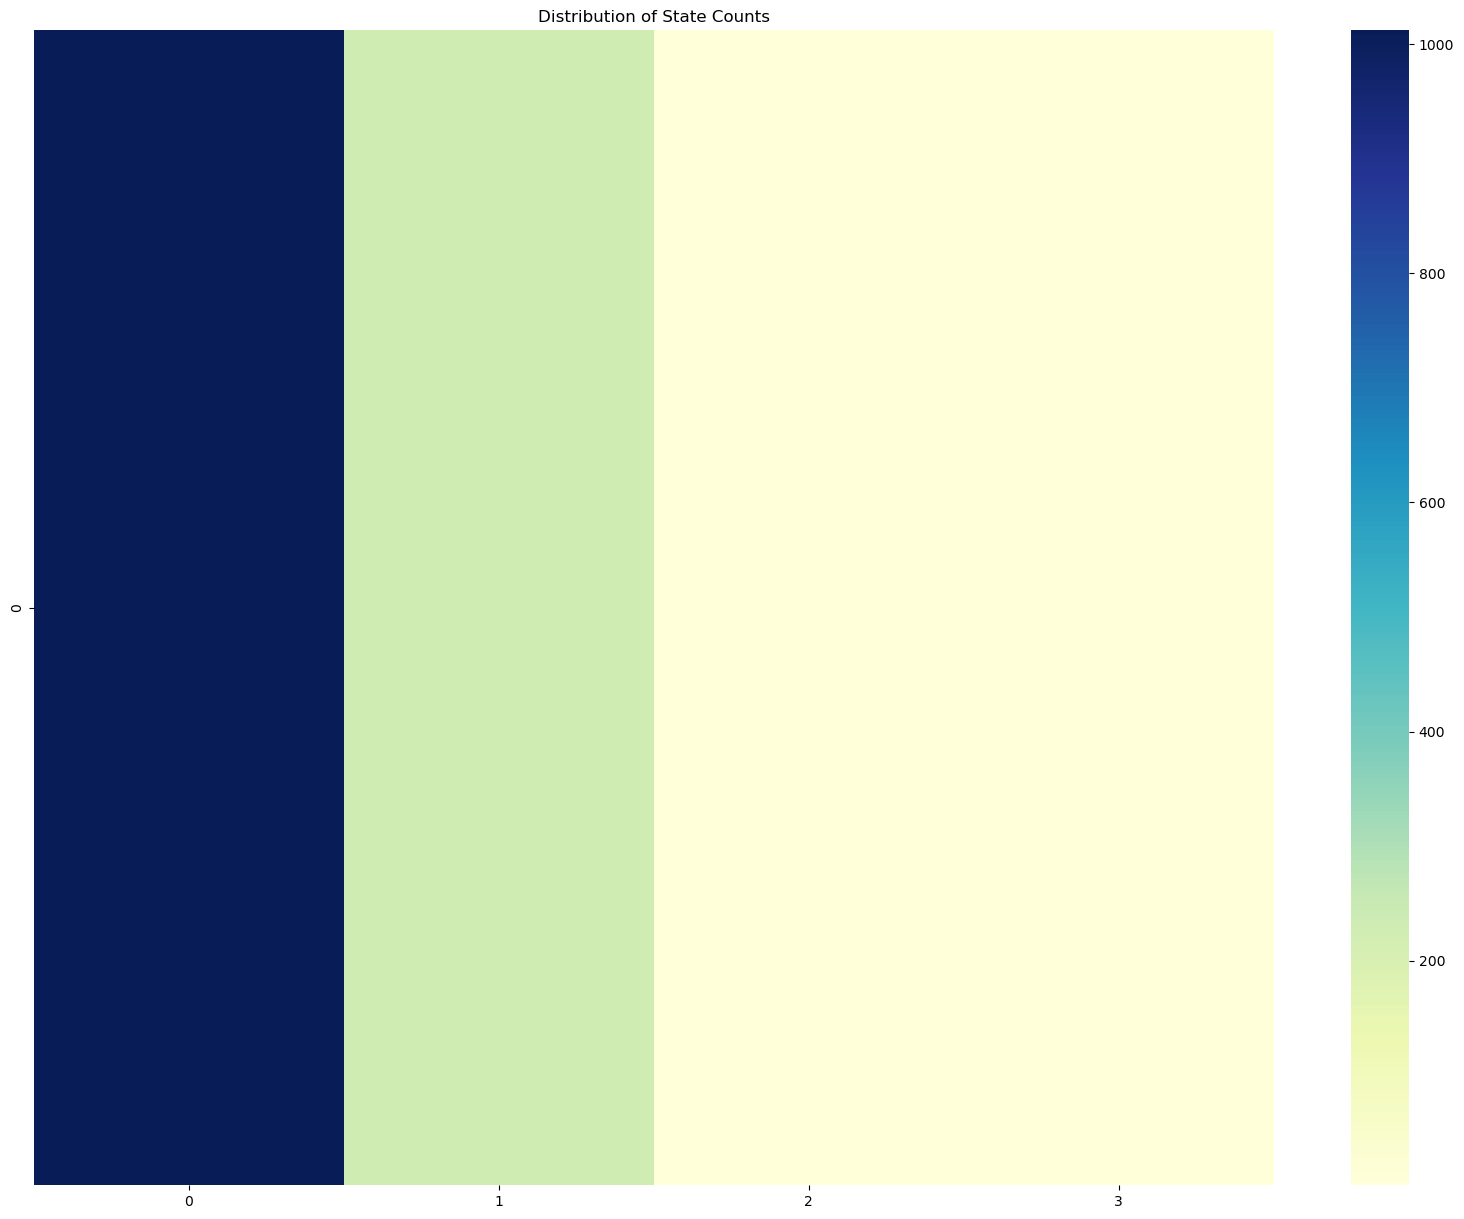

In [98]:
# Get state counts (assuming 'state' is a categorical column)
state_counts = state_data.value_counts()  # Counts occurrences of each unique state

# Reshape to a 2D array for heatmap (assuming enough unique states for a meaningful plot)
state_data_2d = state_counts.values.reshape(1, -1)  # Reshape to 1 row, all columns

# Create a heatmap using seaborn
sns.heatmap(state_data_2d, cmap='YlGnBu')  # Colormap 'YlGnBu' (yellow to blue)

# Add a title and show the plot
plt.title('Distribution of State Counts')
plt.show()

In [99]:
 import seaborn as sns
import pandas as pd
import numpy as np  # Import numpy for reshaping

# Assuming 'df' is your DataFrame
state_data =station_df['state']  # Get state counts

import plotly.express as px
import numpy as np
# df = px.station_df['state'].gapminder().query("year == 2007")
fig = px.treemap(station_df['state'])
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [100]:
import pandas as pd  # Assuming you have pandas imported
import plotly.express as px

# Assuming 'station_df' has a column named 'state' with category counts

fig = px.treemap(station_df)  # Create treemap

# Update layout margins
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Display the plot
fig.show()

In [101]:
station_df['state']

0                 Haryana
1                 Haryana
2               Rajasthan
3           Uttar Pradesh
4           Uttar Pradesh
              ...        
1542               Kerala
1543              Haryana
1544              Haryana
1545    Jammu and Kashmir
1546            Karnataka
Name: state, Length: 1502, dtype: object